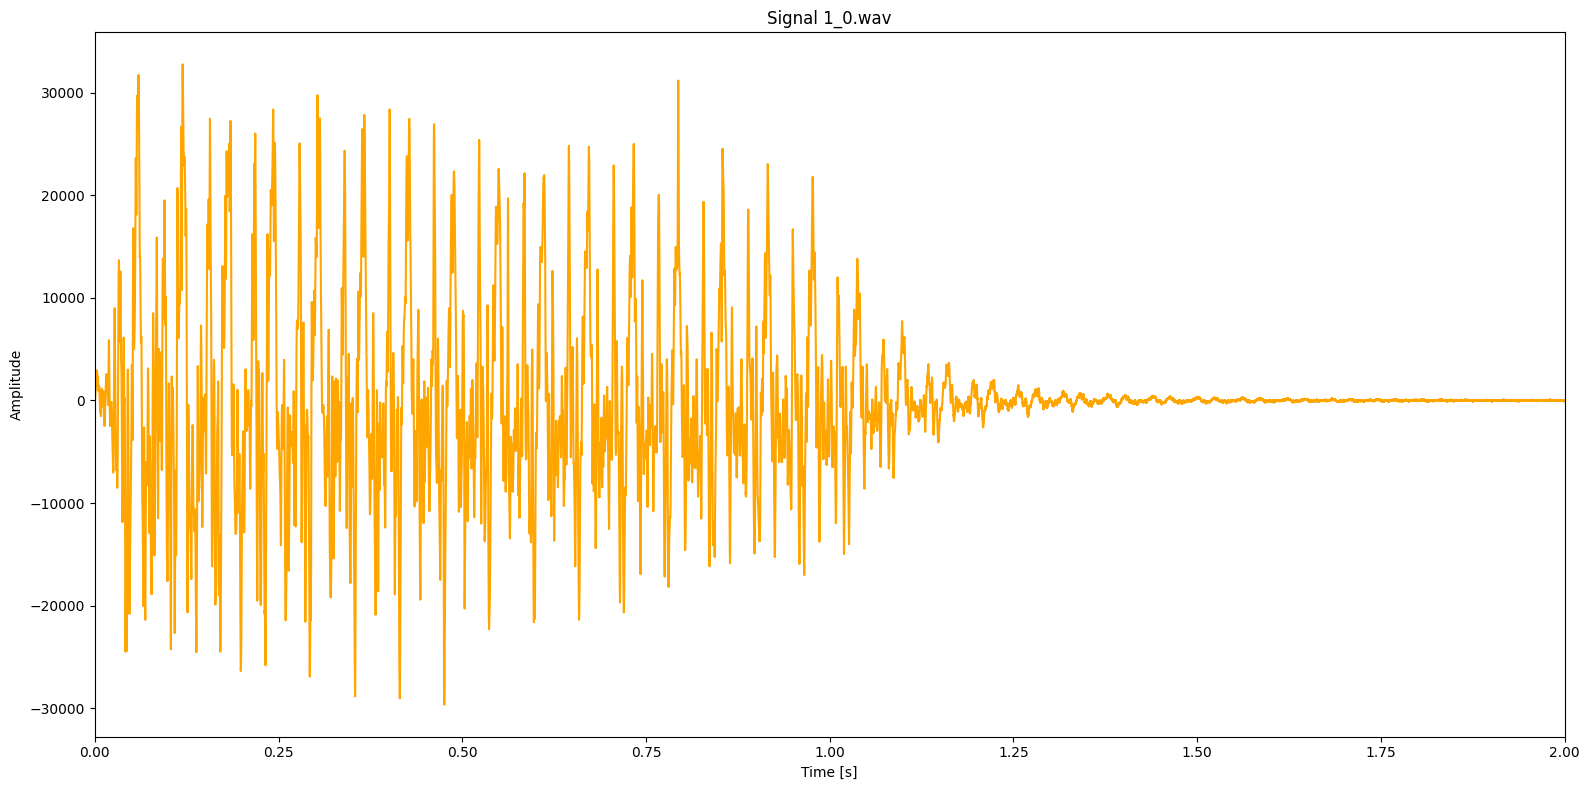

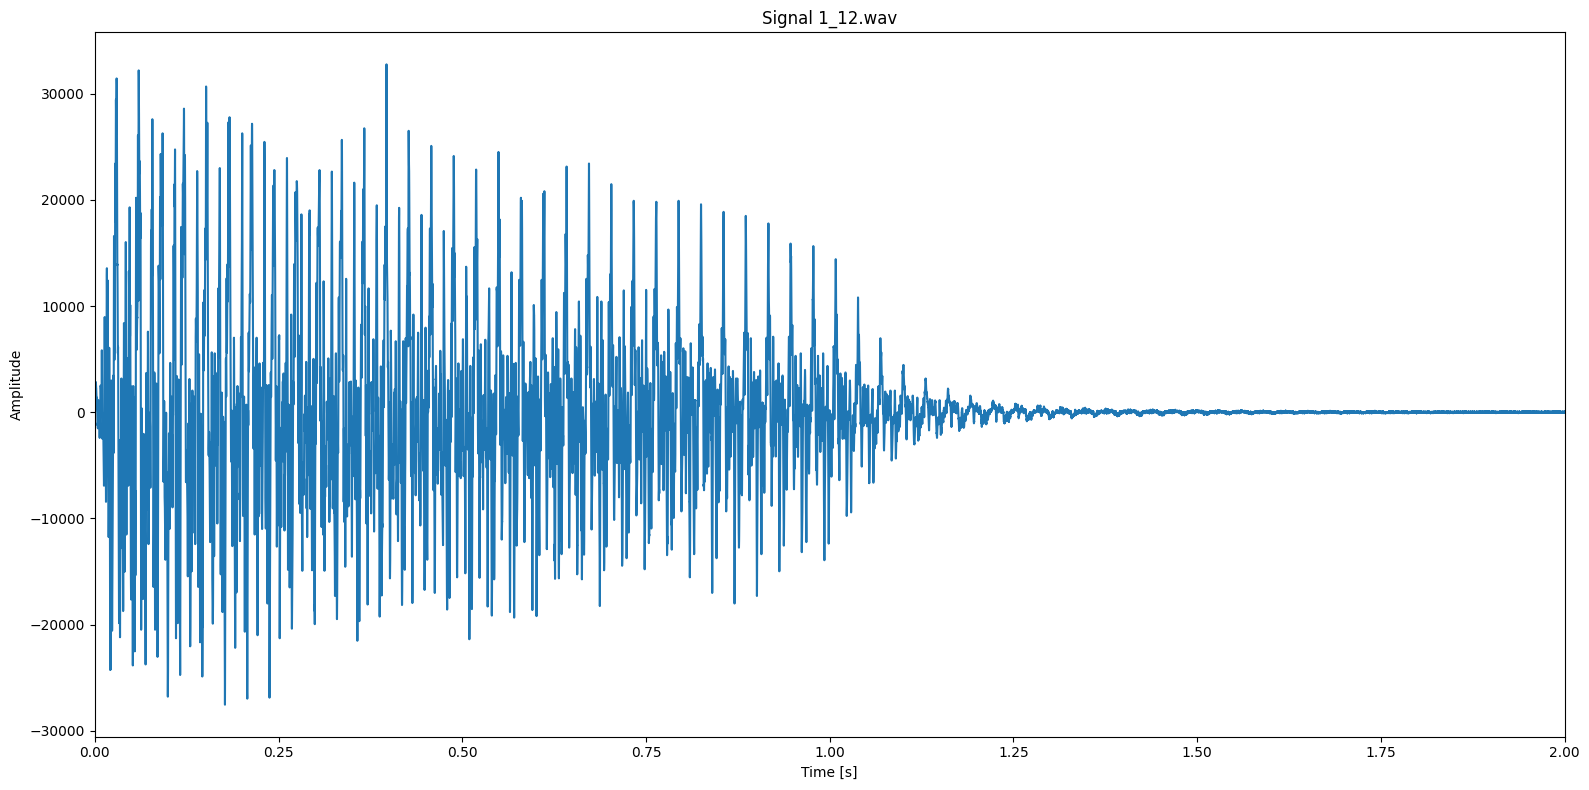

In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

sr1, data1 = wavfile.read('/kaggle/input/notes-wav-data/notes/wav/1_0.wav')
sr2, data2 = wavfile.read('/kaggle/input/notes-wav-data/notes/wav/1_12.wav')

t1 = np.linspace(0, len(data1) / sr1, len(data1))
t2 = np.linspace(0, len(data2) / sr2, len(data2))

# Plot signal 1_0.wav
plt.figure(figsize=(16, 8))
plt.plot(t1, data1, 'orange')
plt.title('Signal 1_0.wav')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim([0, 2])
plt.tight_layout()
plt.show()

# Plot signal 1_12.wav
plt.figure(figsize=(16, 8))
plt.plot(t2, data2)
plt.title('Signal 1_12.wav')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim([0, 2])
plt.tight_layout()
plt.show()

In [2]:
import os
import glob
import random
from collections import Counter

import numpy as np
import pandas as pd
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


DATA_DIR = "/kaggle/input/notes-wav-data/notes/wav"
RANDOM_SEED = 42
TRAIN_RATIO = 0.7
VALID_RATIO = 0.15
TEST_RATIO = 0.15


random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)


paths = glob.glob(os.path.join(DATA_DIR, "*.wav"))

In [3]:
def parse_filename(path):
    fname = os.path.basename(path)
    name, _ = os.path.splitext(fname)
    instrument, note = name.split("_")
    return instrument, note


records = []
for p in paths:
    instrument, note = parse_filename(p)
    records.append({"path": p, "instrument": instrument, "note": note})
df = pd.DataFrame(records)


combo = df["instrument"] + "-" + df["note"]
counts = combo.value_counts()
df["stratify_label"] = combo
rare_labels = counts[counts < 2].index
if len(rare_labels) > 0:
    mask = df["stratify_label"].isin(rare_labels)
    df.loc[mask, "stratify_label"] = df.loc[mask, "instrument"]
assert df["stratify_label"].value_counts().min() >= 2


train_df, temp_df = train_test_split(
    df, test_size=1-TRAIN_RATIO, stratify=df["stratify_label"], random_state=RANDOM_SEED)
val_df, test_df = train_test_split(temp_df, test_size=TEST_RATIO/(
    VALID_RATIO+TEST_RATIO), stratify=temp_df["stratify_label"], random_state=RANDOM_SEED)


def print_stats(name, subset_df):
    print(f"--- {name.upper()} ({len(subset_df)} samples) ---")
    print(Counter(subset_df["instrument"]))
    print(Counter(subset_df["note"]))


print_stats("train", train_df)
print_stats("validation", val_df)
print_stats("test", test_df)

--- TRAIN (9676 samples) ---
Counter({'81': 76, '85': 76, '0': 76, '19': 76, '24': 76, '6': 76, '64': 76, '34': 76, '93': 76, '14': 76, '12': 76, '107': 76, '45': 76, '21': 76, '31': 76, '26': 76, '2': 76, '41': 76, '47': 76, '16': 76, '56': 76, '79': 76, '97': 76, '112': 76, '43': 76, '84': 76, '113': 76, '98': 76, '57': 76, '53': 76, '68': 76, '42': 76, '102': 76, '120': 76, '15': 76, '106': 76, '125': 76, '108': 76, '94': 76, '44': 76, '126': 76, '118': 76, '66': 76, '69': 76, '72': 76, '4': 76, '18': 76, '52': 76, '123': 76, '78': 76, '86': 76, '28': 76, '122': 76, '109': 76, '100': 76, '114': 76, '7': 76, '90': 76, '33': 76, '105': 76, '71': 76, '13': 76, '121': 76, '5': 76, '22': 76, '23': 76, '60': 76, '46': 76, '88': 76, '101': 76, '115': 76, '70': 76, '111': 76, '11': 76, '54': 76, '104': 76, '63': 75, '20': 75, '25': 75, '127': 75, '117': 75, '83': 75, '39': 75, '110': 75, '89': 75, '95': 75, '50': 75, '124': 75, '51': 75, '82': 75, '116': 75, '59': 75, '37': 75, '49': 75, '9

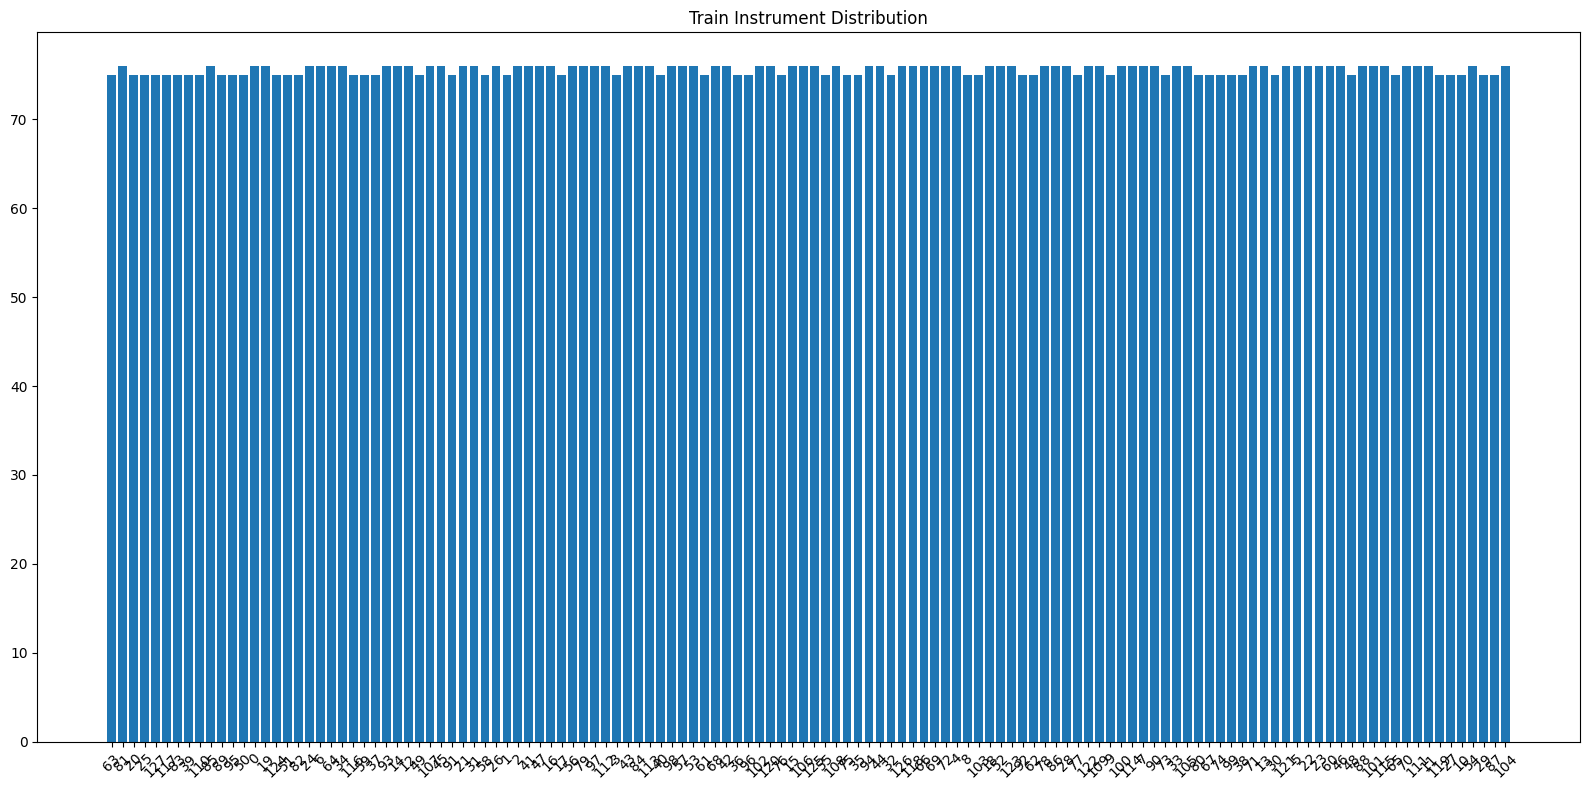

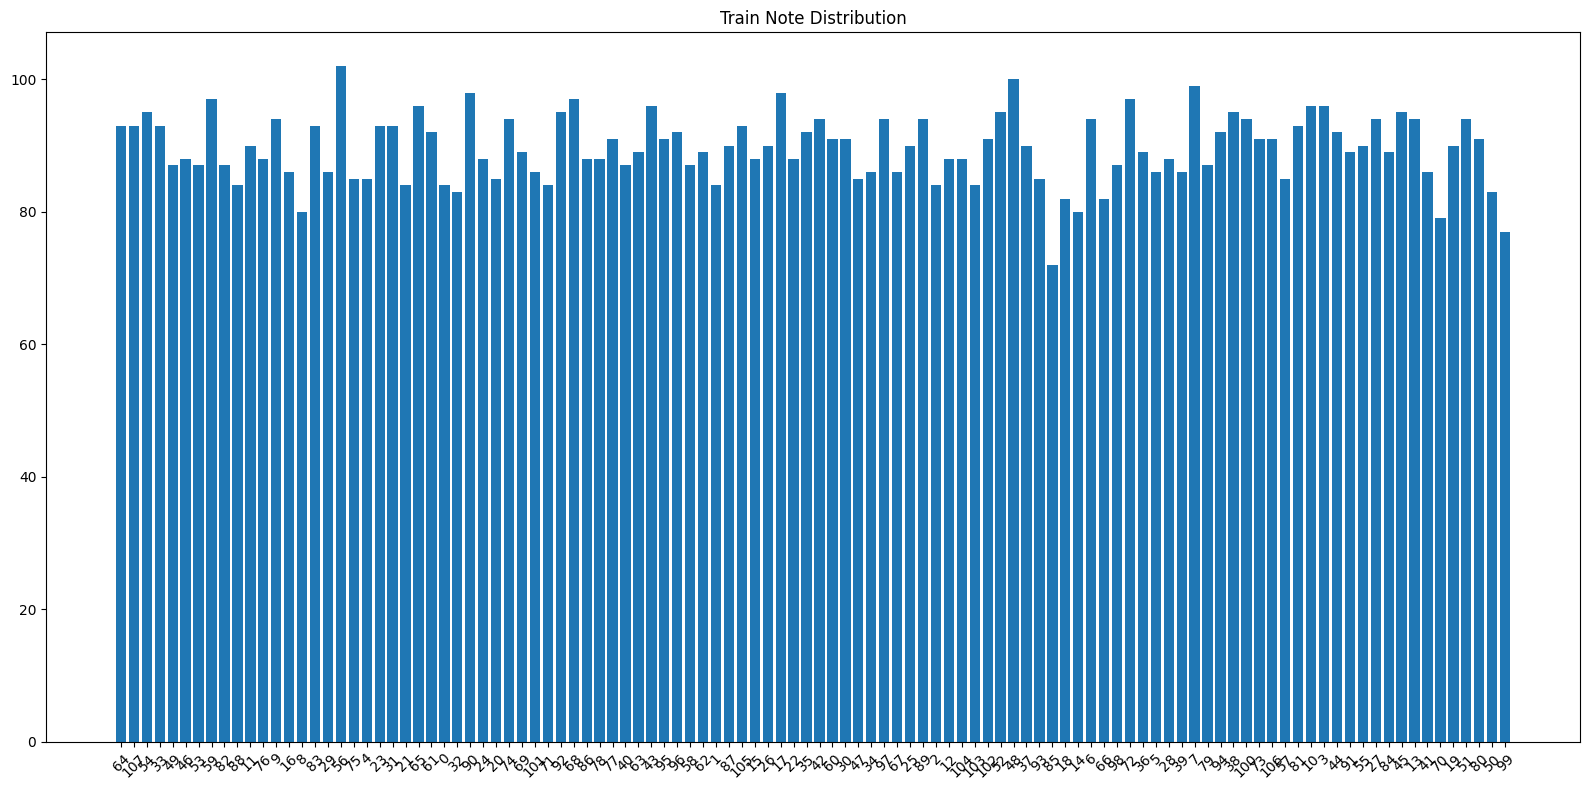

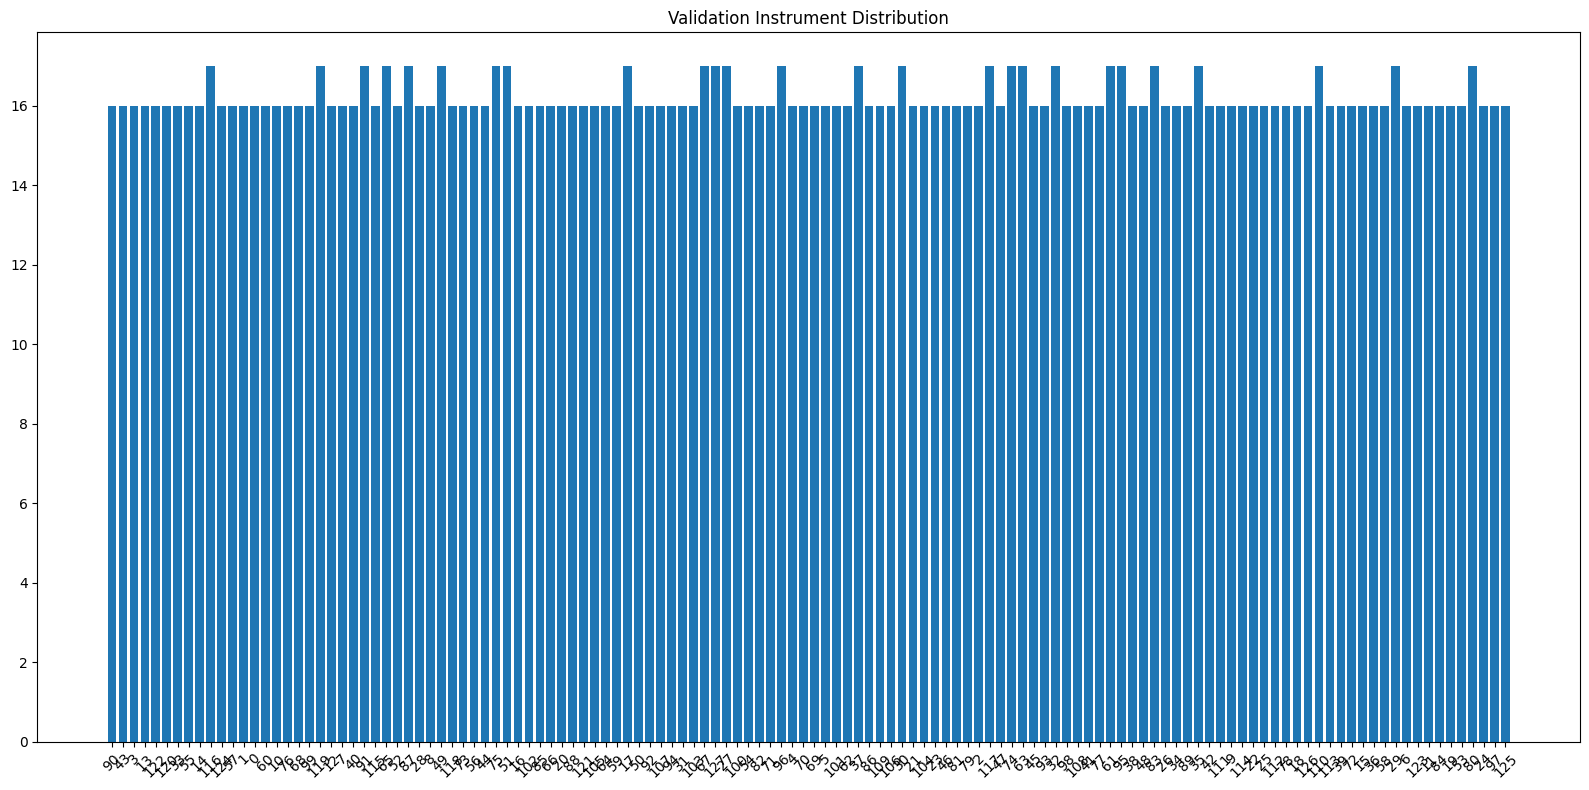

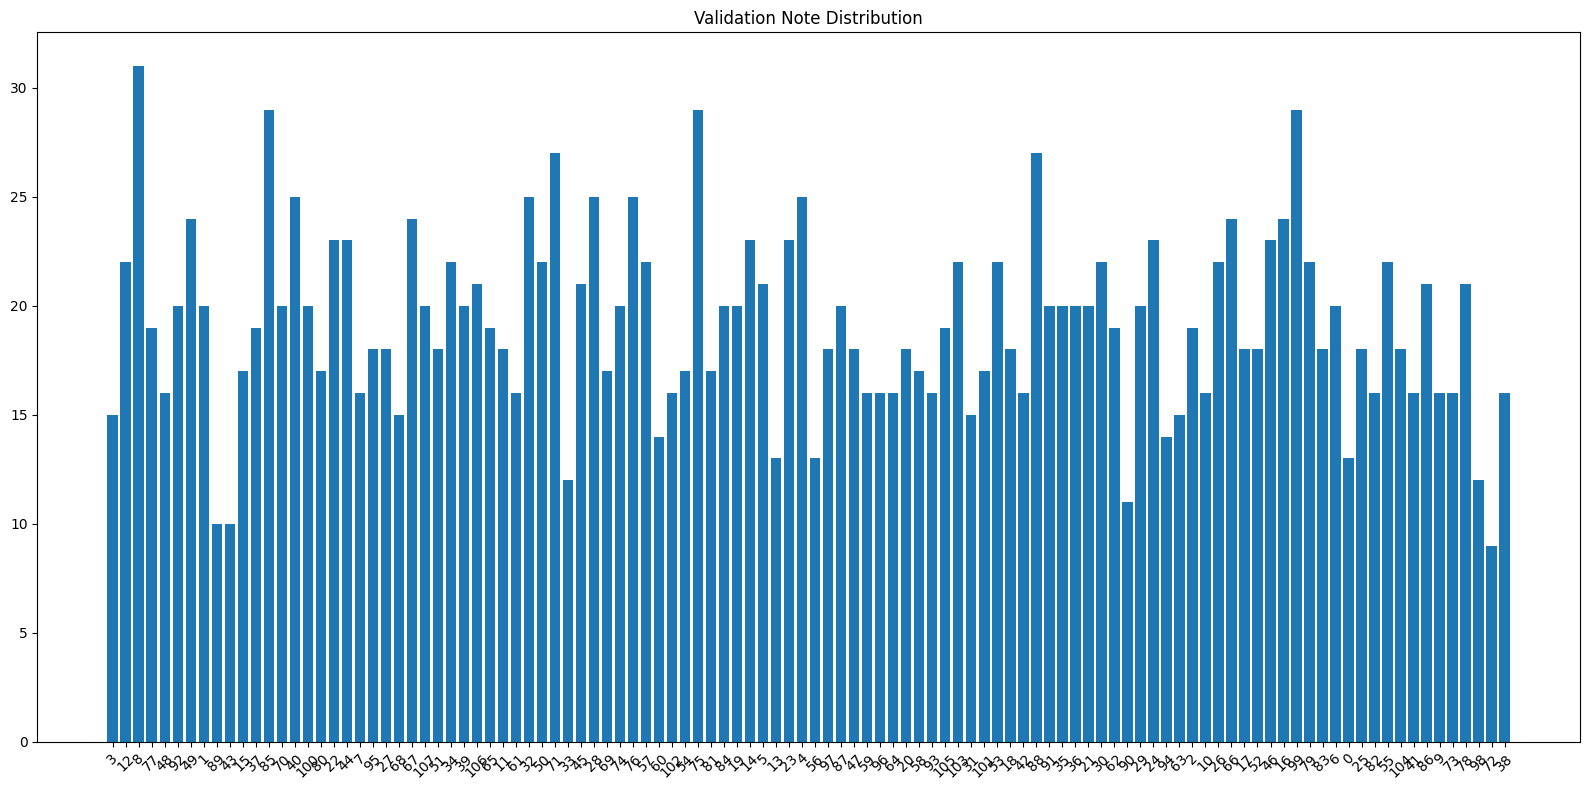

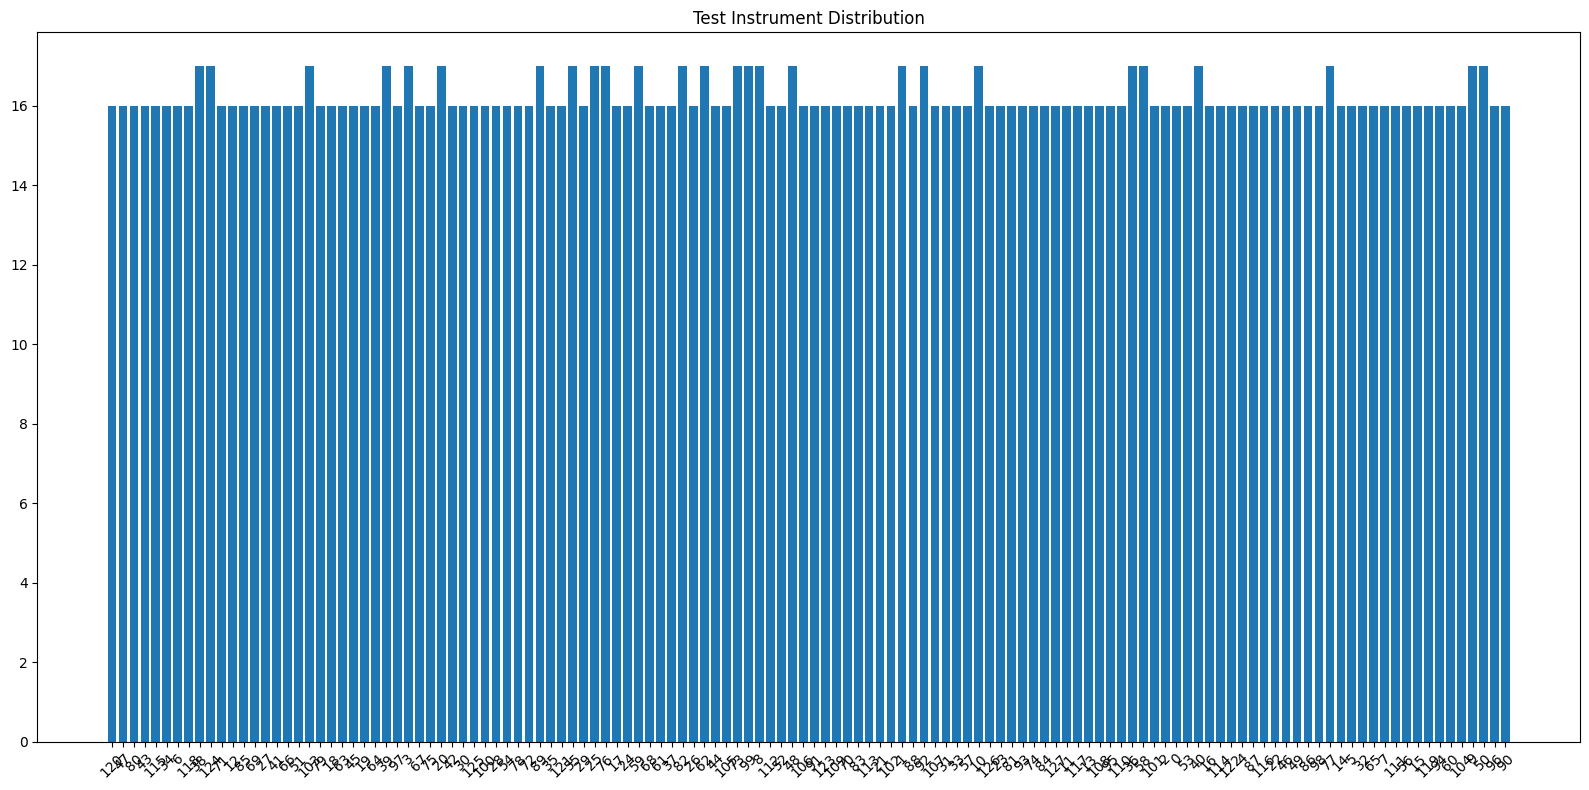

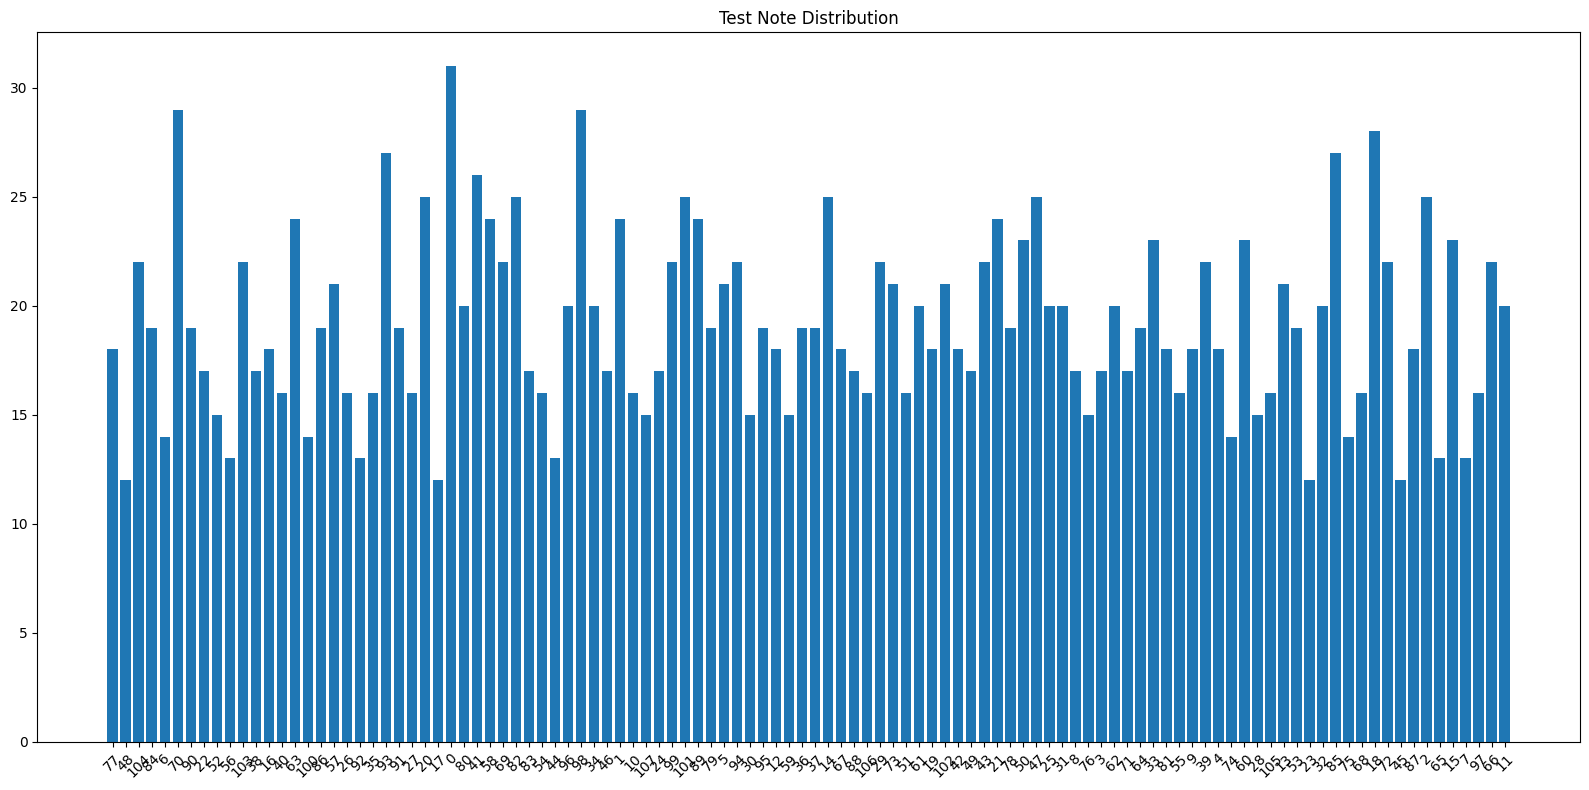

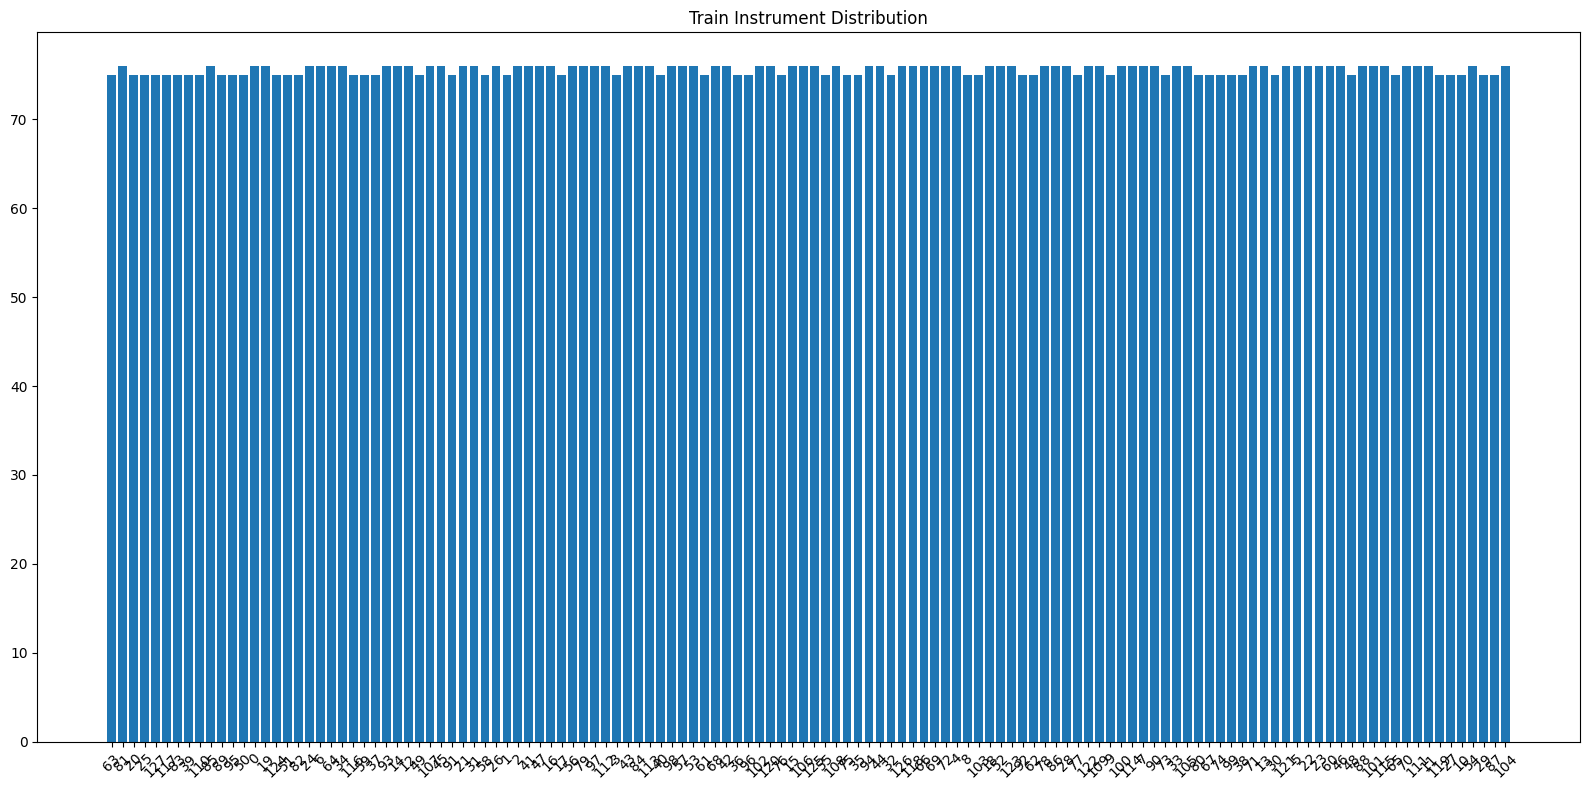

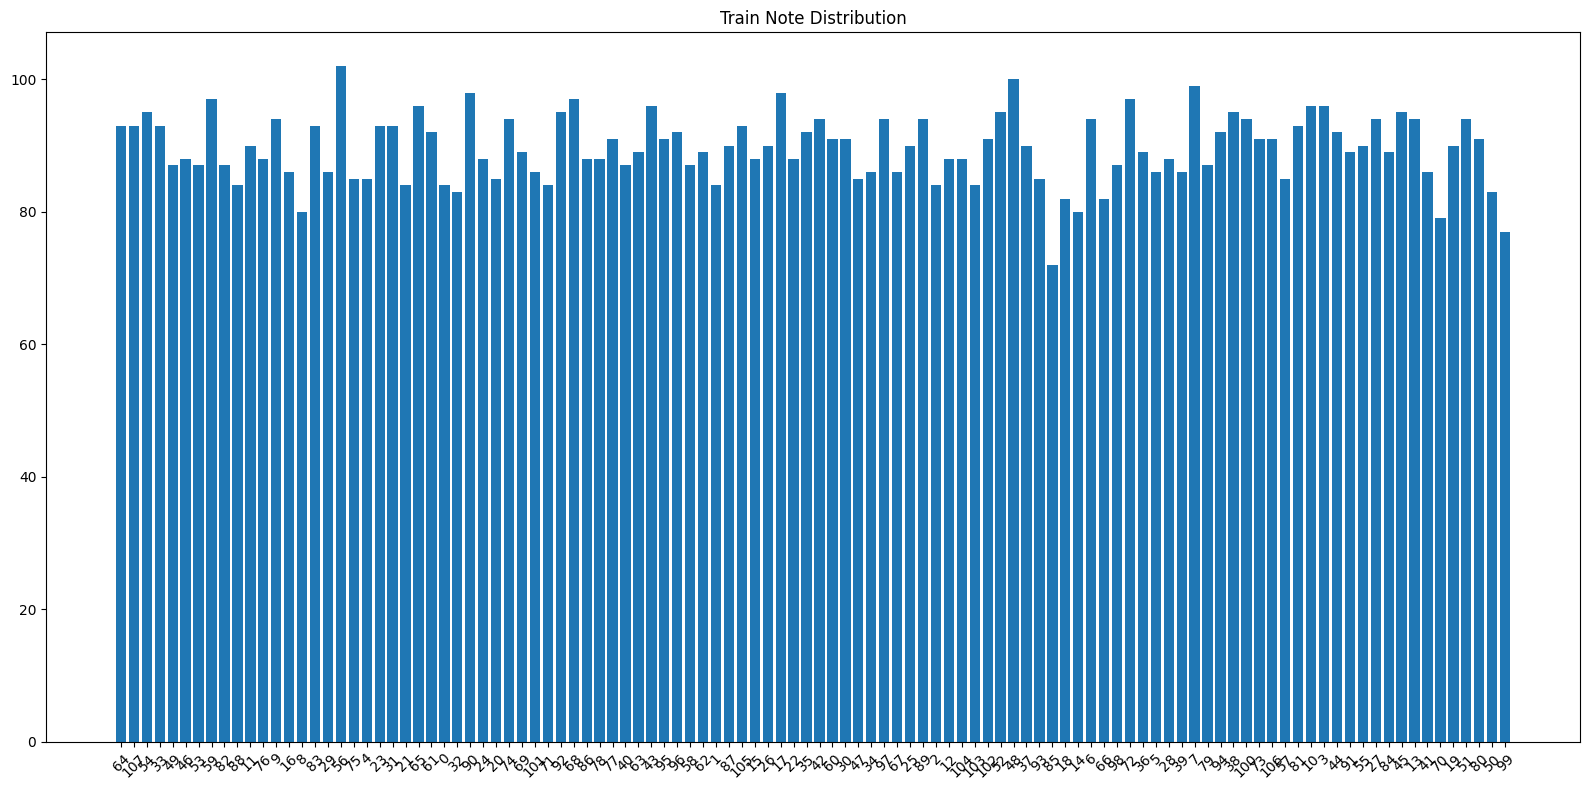

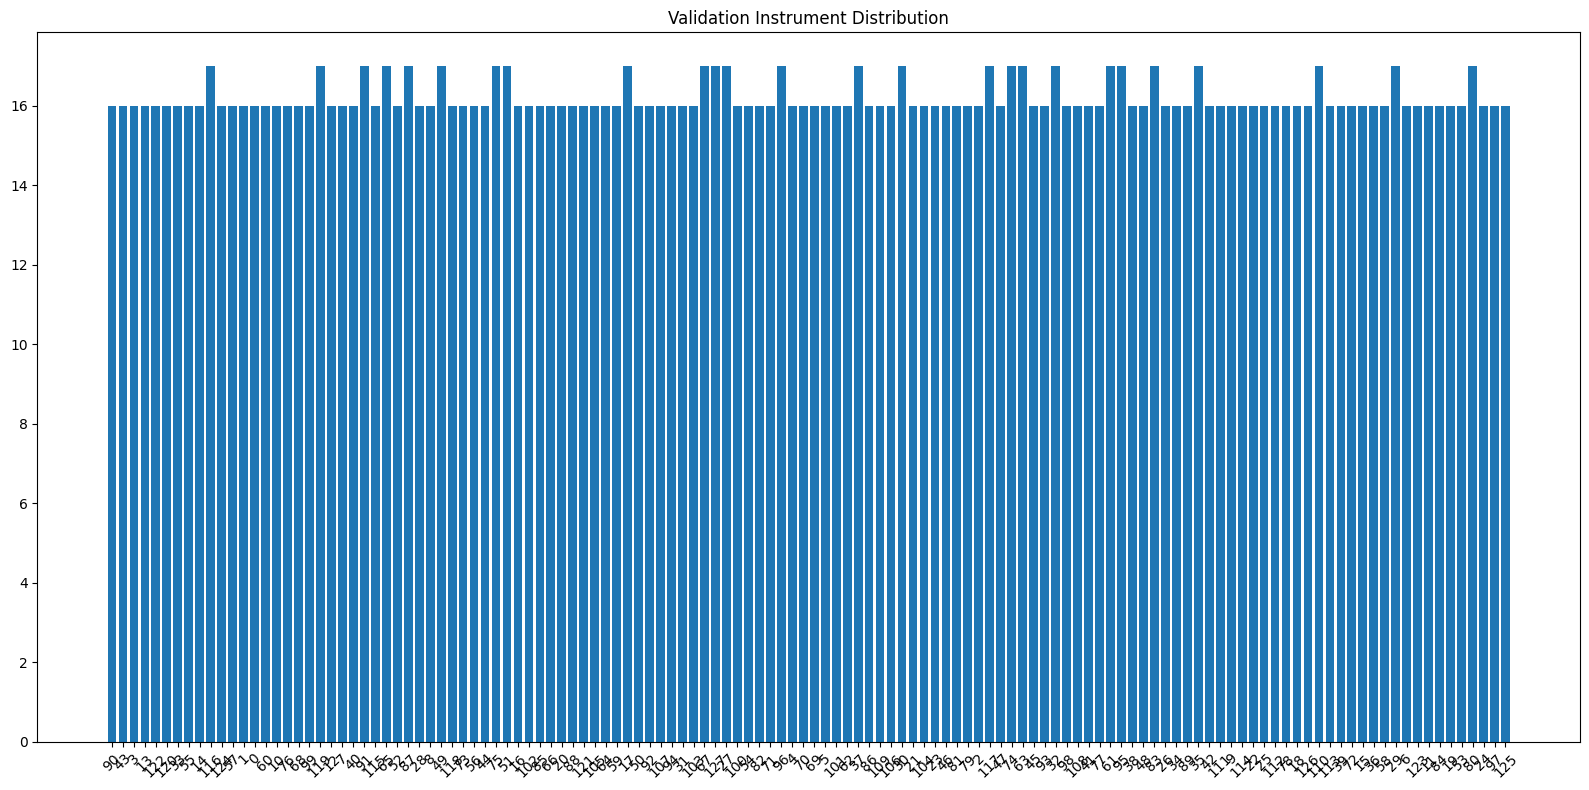

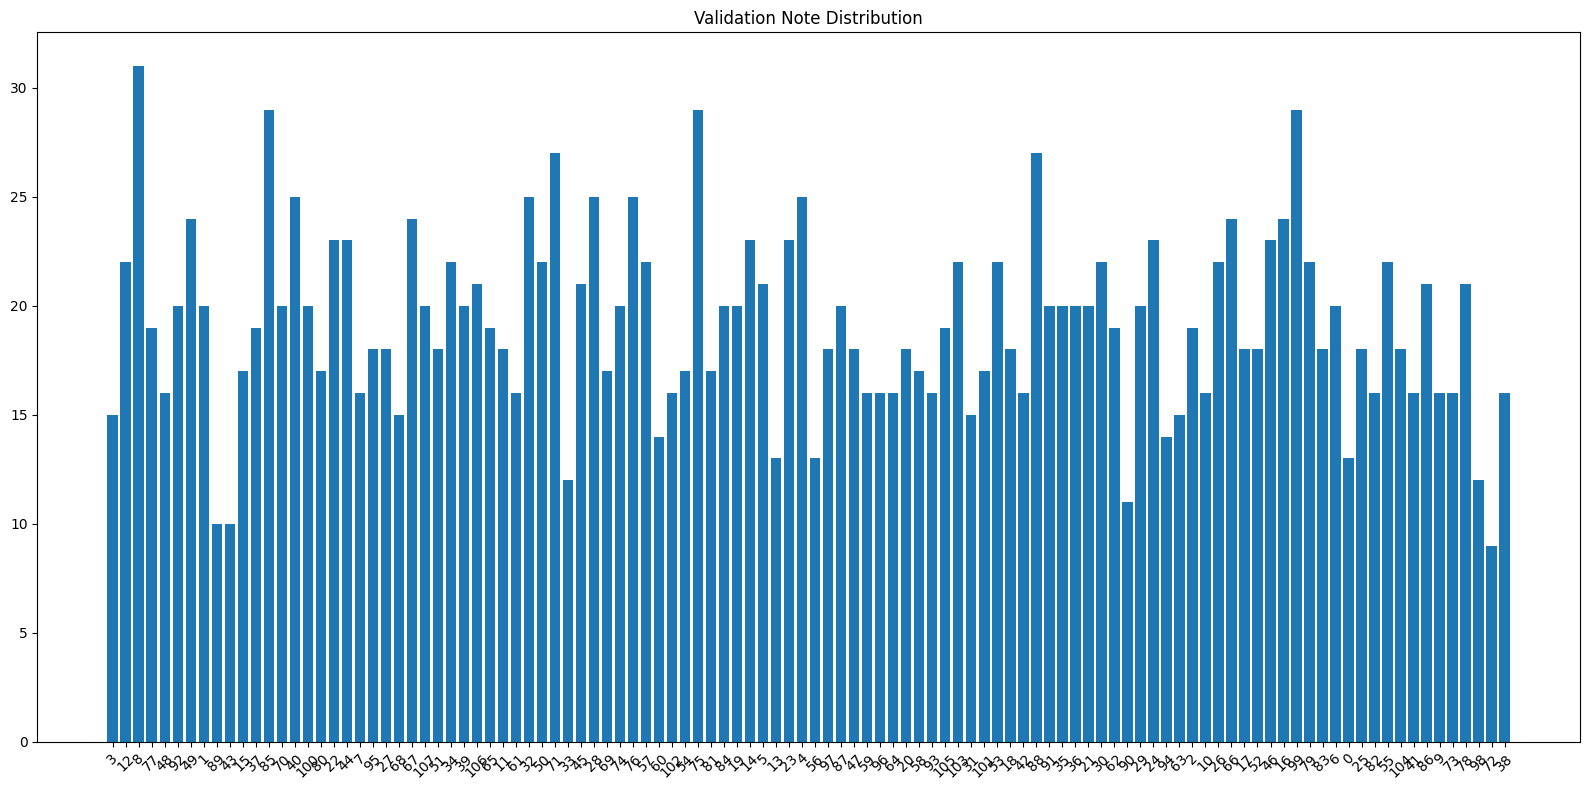

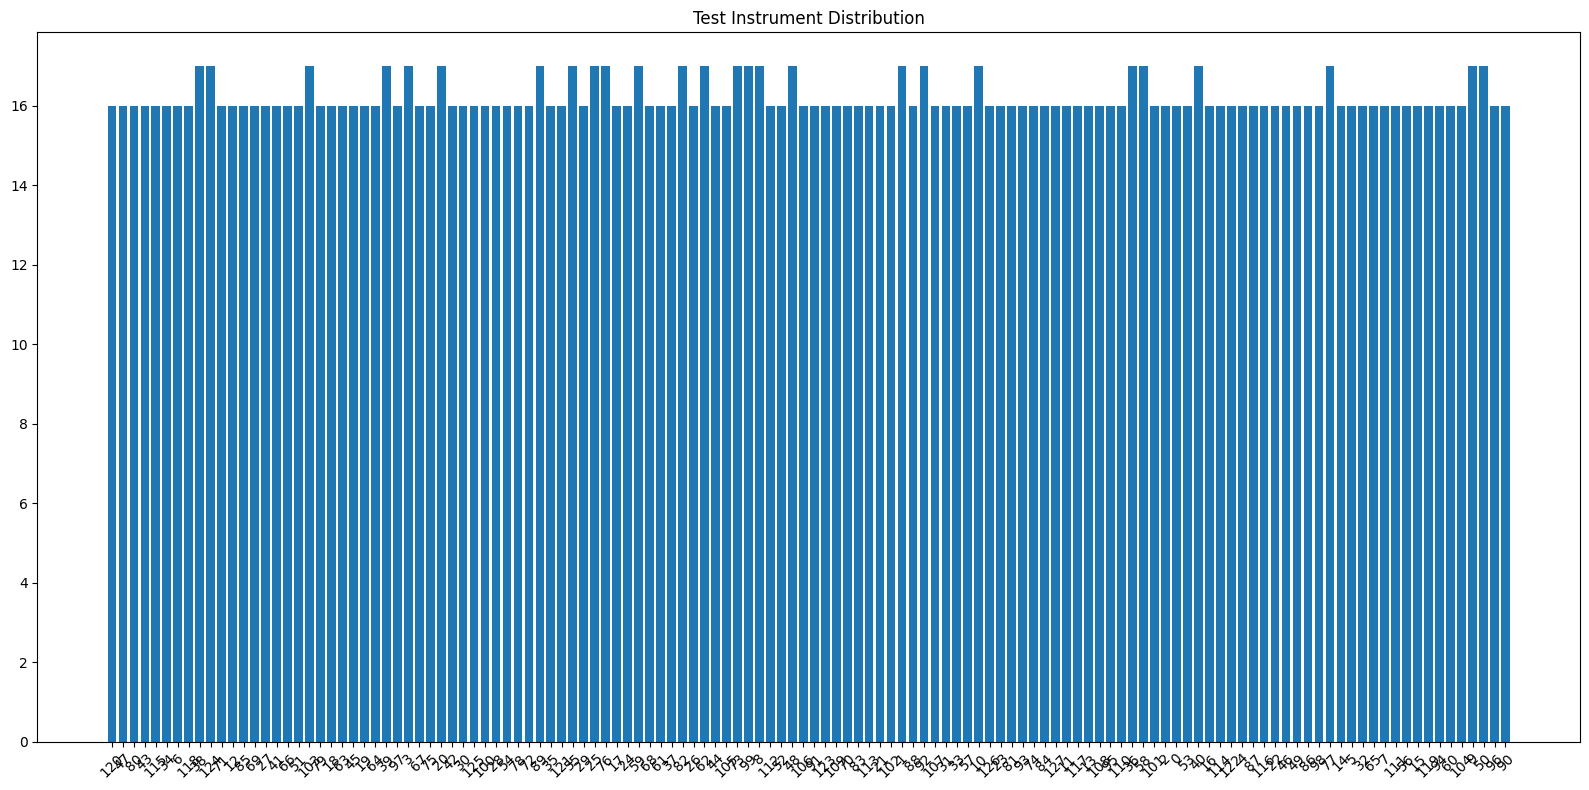

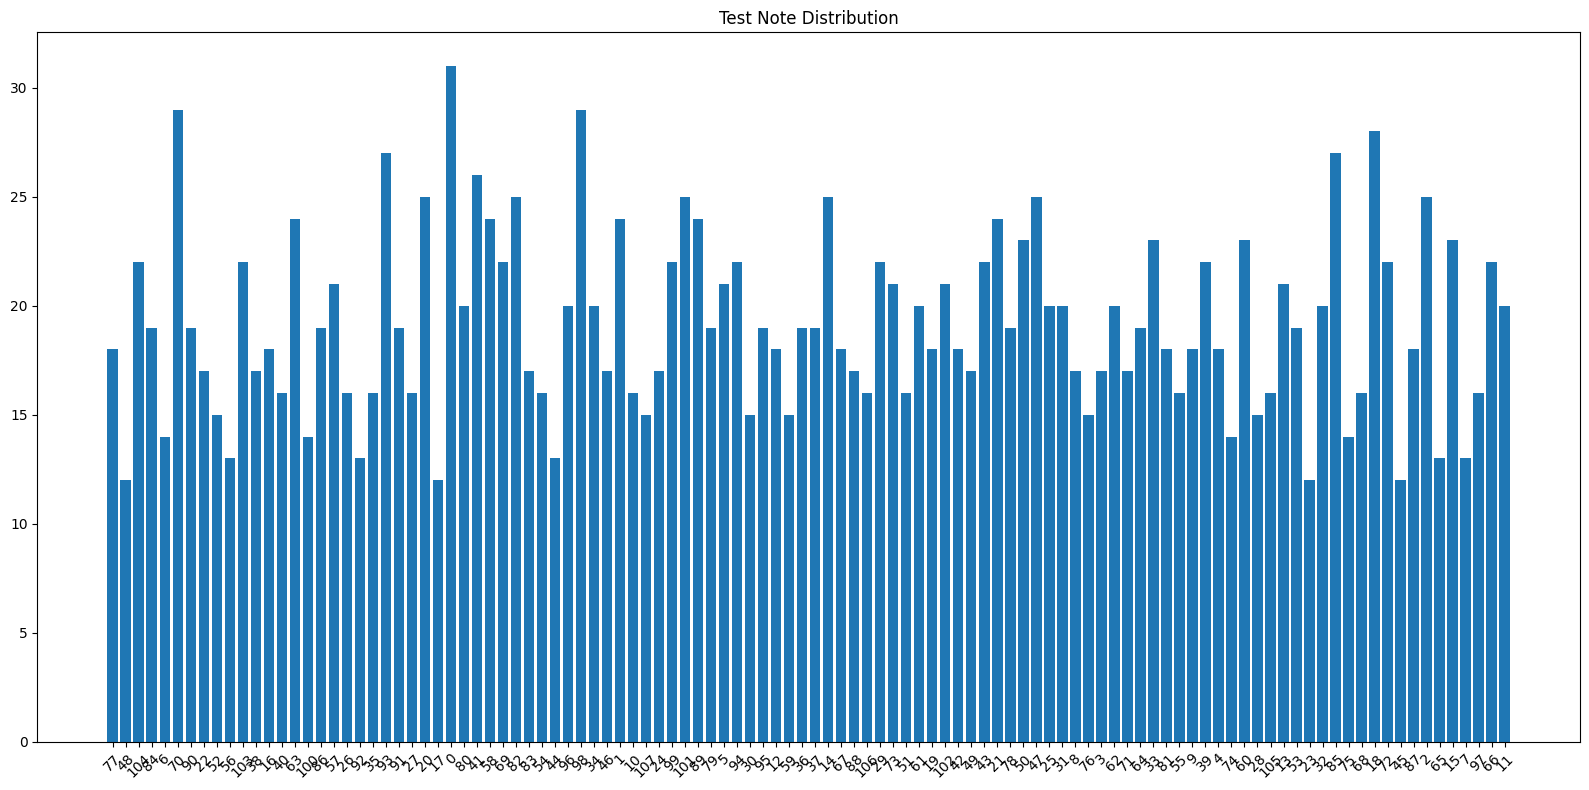

In [4]:
subsets = [("Train", train_df), ("Validation", val_df), ("Test", test_df)]
for name, subset in subsets:
    inst_counts = Counter(subset["instrument"])
    plt.figure(figsize=(16, 8))
    plt.bar(list(inst_counts.keys()), list(inst_counts.values()))
    plt.title(f"{name} Instrument Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    note_counts = Counter(subset["note"])
    plt.figure(figsize=(16, 8))
    plt.bar(list(note_counts.keys()), list(note_counts.values()))
    plt.title(f"{name} Note Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


out_dir = "splits"
os.makedirs(out_dir, exist_ok=True)
train_df.to_csv(os.path.join(out_dir, "train_split.csv"), index=False)
val_df.to_csv(os.path.join(out_dir, "validation_split.csv"), index=False)
test_df.to_csv(os.path.join(out_dir, "test_split.csv"), index=False)

subsets = [("Train", train_df), ("Validation", val_df), ("Test", test_df)]
for name, subset in subsets:
    inst_counts = Counter(subset["instrument"])
    plt.figure(figsize=(16, 8))
    plt.bar(list(inst_counts.keys()), list(inst_counts.values()))
    plt.title(f"{name} Instrument Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    note_counts = Counter(subset["note"])
    plt.figure(figsize=(16, 8))
    plt.bar(list(note_counts.keys()), list(note_counts.values()))
    plt.title(f"{name} Note Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


out_dir = "splits"
os.makedirs(out_dir, exist_ok=True)
train_df.to_csv(os.path.join(out_dir, "train_split.csv"), index=False)
val_df.to_csv(os.path.join(out_dir, "validation_split.csv"), index=False)
test_df.to_csv(os.path.join(out_dir, "test_split.csv"), index=False)

2025-05-18 10:44:51.428536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747565091.622133      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747565091.680687      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1747565239.805175      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(sha


Training RNN model...
Epoch 1/50


I0000 00:00:1747565246.095715     110 service.cc:148] XLA service 0x3ad2c1c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747565246.096272     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747565246.452979     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


 56/303 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0767 - loss: 4.5530

I0000 00:00:1747565247.409692     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


303/303 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1608 - loss: 4.2353 - val_accuracy: 0.2994 - val_loss: 3.4868
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4468 - loss: 2.7559 - val_accuracy: 0.3824 - val_loss: 2.9363
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5980 - loss: 1.8263 - val_accuracy: 0.4021 - val_loss: 2.7606
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6934 - loss: 1.3419 - val_accuracy: 0.4209 - val_loss: 2.6975
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7475 - loss: 1.0375 - val_accuracy: 0.4127 - val_loss: 2.7696
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7977 - loss: 0.8171 - val_accuracy: 0.4185 - val_loss: 2.8115
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8210 - loss: 0.7059 - val_accuracy: 0.4243 - val_loss: 2.8786
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8447 - loss: 0.5986 - val_accuracy: 0.4224 - val

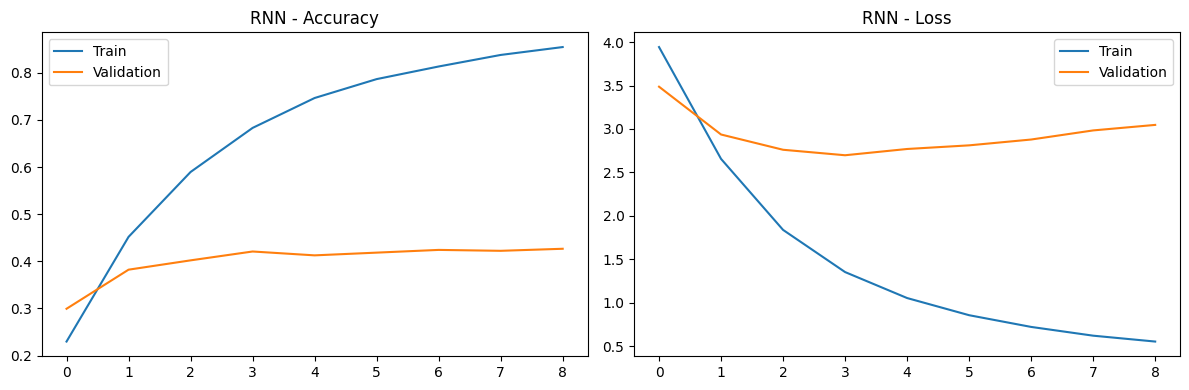

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


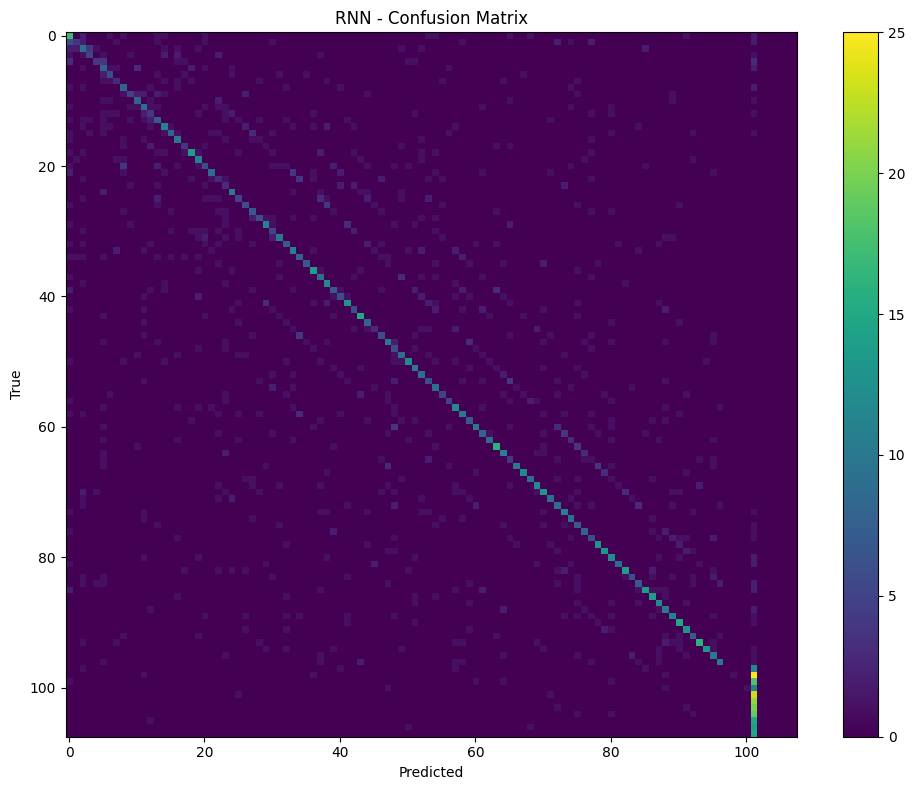


Training LSTM model...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.1466 - loss: 4.2542 - val_accuracy: 0.3611 - val_loss: 2.7356
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5483 - loss: 1.8758 - val_accuracy: 0.4311 - val_loss: 2.4060
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7267 - loss: 1.0524 - val_accuracy: 0.4590 - val_loss: 2.4985
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8102 - loss: 0.7018 - val_accuracy: 0.4653 - val_loss: 2.7066
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8406 - loss: 0.5619 - val_accuracy: 0.4590 - val_loss: 2.9210
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8492 - loss: 0.5335 - val_accuracy: 0.4532 - val_loss: 3.1053
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8578 - loss: 0.4967 - val_accuracy: 0.4518 - val_loss: 3.2622
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4296 - loss: 2.5243


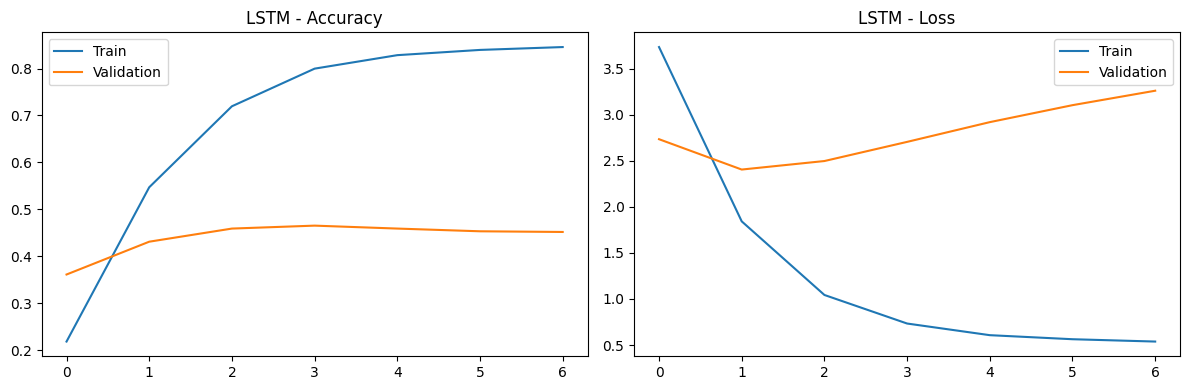

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


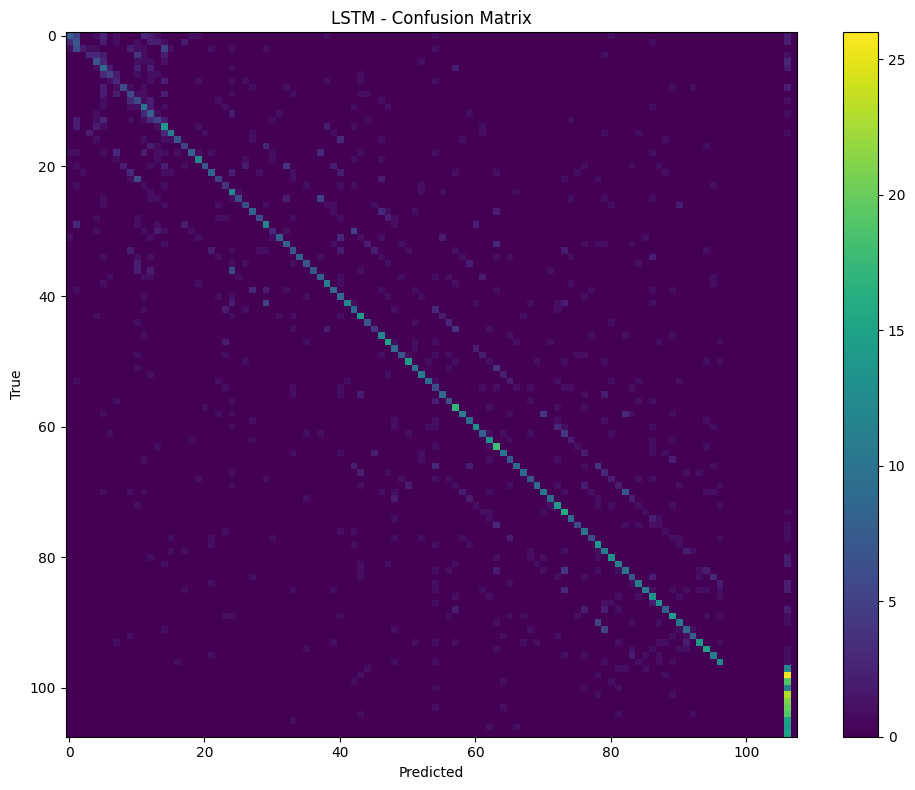


Training GRU model...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1599 - loss: 4.2032 - val_accuracy: 0.3780 - val_loss: 2.8134
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5504 - loss: 1.9120 - val_accuracy: 0.4556 - val_loss: 2.4155
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7470 - loss: 1.0054 - val_accuracy: 0.4566 - val_loss: 2.5449
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8203 - loss: 0.6684 - val_accuracy: 0.4643 - val_loss: 2.7626
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8519 - loss: 0.5364 - val_accuracy: 0.4499 - val_loss: 2.9689
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8489 - loss: 0.5088 - val_accuracy: 0.4614 - val_loss: 3.1761
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8655 - loss: 0.4572 - val_accuracy: 0.4368 - val_loss: 3.3814
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4476 - loss: 2.4480


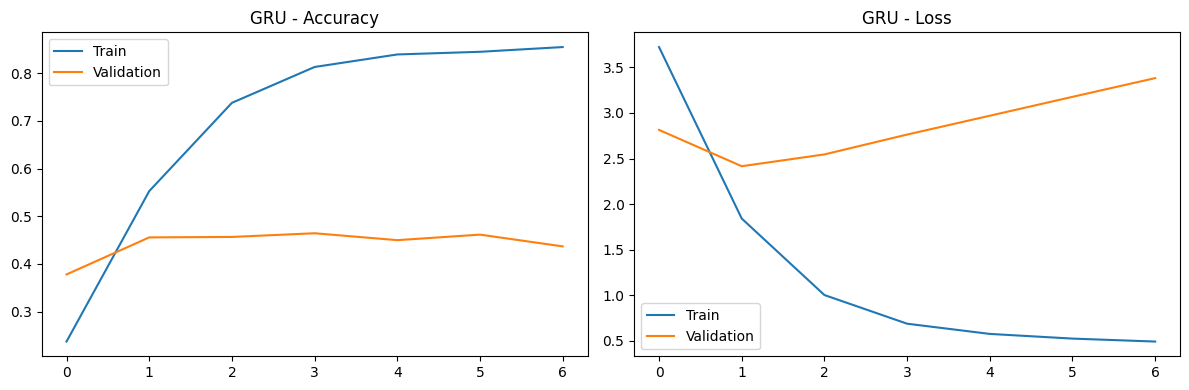

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


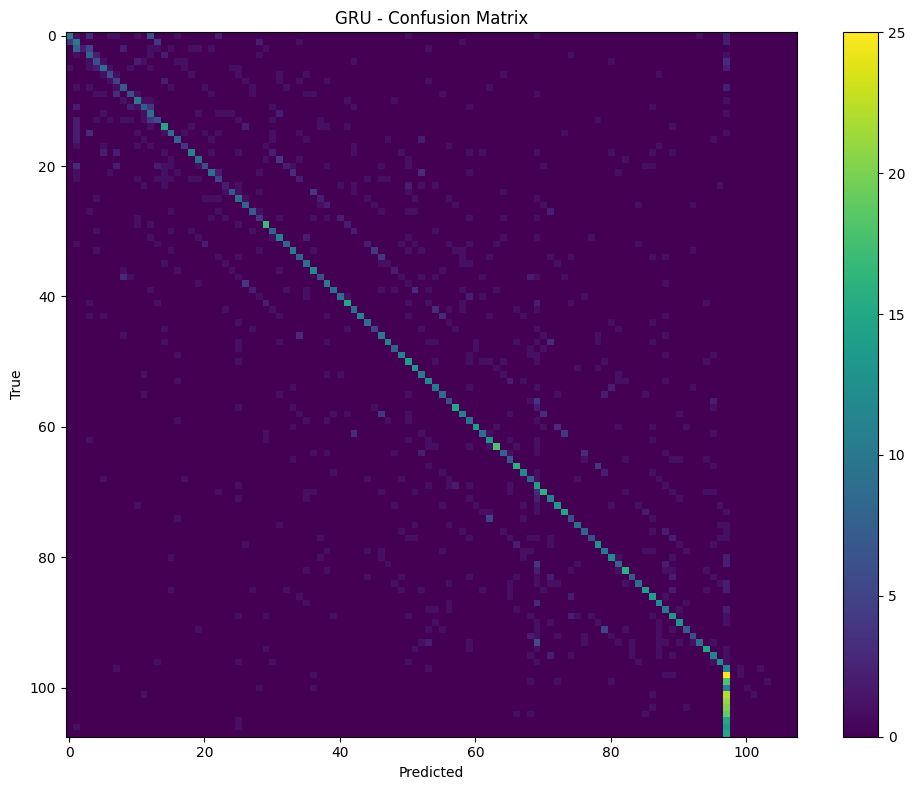

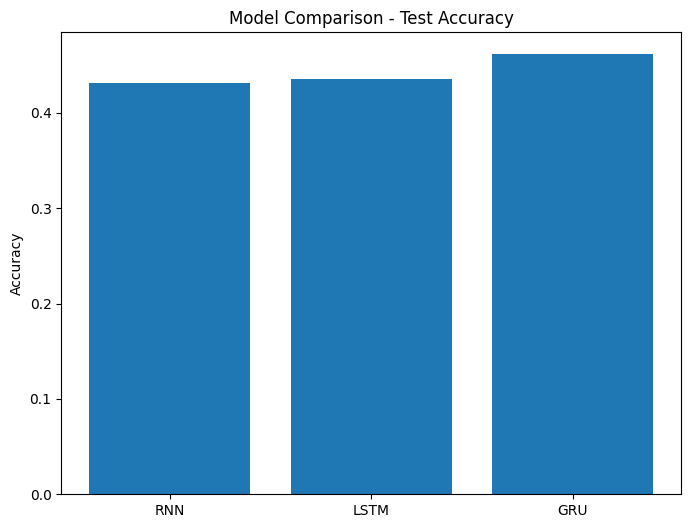

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import librosa

def process_audio(file_path, frame_length=250):
    n_samples = int(44100 * frame_length / 1000)
    
    audio, _ = librosa.load(file_path, sr=44100)
    
    audio = audio / np.max(np.abs(audio))
    
    if len(audio) > n_samples:
        audio = audio[:n_samples]
    else:
        audio = np.pad(audio, (0, n_samples - len(audio)))
        
    return audio.reshape(1, -1, 1)

def create_models(input_shape, num_classes=108):
    models = {}
    
    # RNN
    rnn_model = Sequential([
        SimpleRNN(128, input_shape=input_shape, return_sequences=True),
        SimpleRNN(64),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    models['RNN'] = rnn_model
    
    # LSTM
    lstm_model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),
        LSTM(64),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    models['LSTM'] = lstm_model
    
    # GRU
    gru_model = Sequential([
        GRU(128, input_shape=input_shape, return_sequences=True),
        GRU(64),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    models['GRU'] = gru_model
    
    return models

def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ModelCheckpoint(f'best_{model_name}.keras', save_best_only=True)
    ]
    
    history = model.fit(X_train, y_train,
                       validation_data=(X_val, y_val),
                       epochs=50,
                       batch_size=32,
                       callbacks=callbacks)
    
    test_loss, test_acc = model.evaluate(X_test, y_test)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{model_name} - Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred_classes)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', aspect='auto')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    return history, test_acc

train_df = pd.read_csv('splits/train_split.csv')
val_df = pd.read_csv('splits/validation_split.csv')
test_df = pd.read_csv('splits/test_split.csv')

X_train = np.array([process_audio(file) for file in train_df['path']])
X_val = np.array([process_audio(file) for file in val_df['path']])
X_test = np.array([process_audio(file) for file in test_df['path']])

label_map = {note: idx for idx, note in enumerate(sorted(set(train_df['note'])))}
y_train = np.array([label_map[note] for note in train_df['note']])
y_val = np.array([label_map[note] for note in val_df['note']])
y_test = np.array([label_map[note] for note in test_df['note']])

input_shape = (X_train.shape[1], X_train.shape[2])
models = create_models(input_shape)

results = {}
for name, model in models.items():
    print(f"\nTraining {name} model...")
    history, acc = train_and_evaluate(model, X_train, y_train, X_val, y_val, 
                                    X_test, y_test, name)
    results[name] = {'history': history, 'accuracy': acc}

accuracies = {name: res['accuracy'] for name, res in results.items()}
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Comparison - Test Accuracy')
plt.ylabel('Accuracy')
plt.show()


=== Training models with dropout rate: 0.1 ===

Training RNN_dropout_0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1149 - loss: 4.3656 - val_accuracy: 0.2729 - val_loss: 3.6851
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3611 - loss: 3.1999 - val_accuracy: 0.3496 - val_loss: 3.1724
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5005 - loss: 2.3749 - val_accuracy: 0.3828 - val_loss: 2.9064
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5686 - loss: 1.9045 - val_accuracy: 0.3867 - val_loss: 2.8434
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6207 - loss: 1.5910 - val_accuracy: 0.4113 - val_loss: 2.7857
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6631 - loss: 1.3749 - val_accuracy: 0.4108 - val_loss: 2.8147
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6839 - loss: 1.2667 - val_accuracy: 0.4161 - val_loss: 2.8562
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7025 - loss: 1.1361 - val_accuracy: 

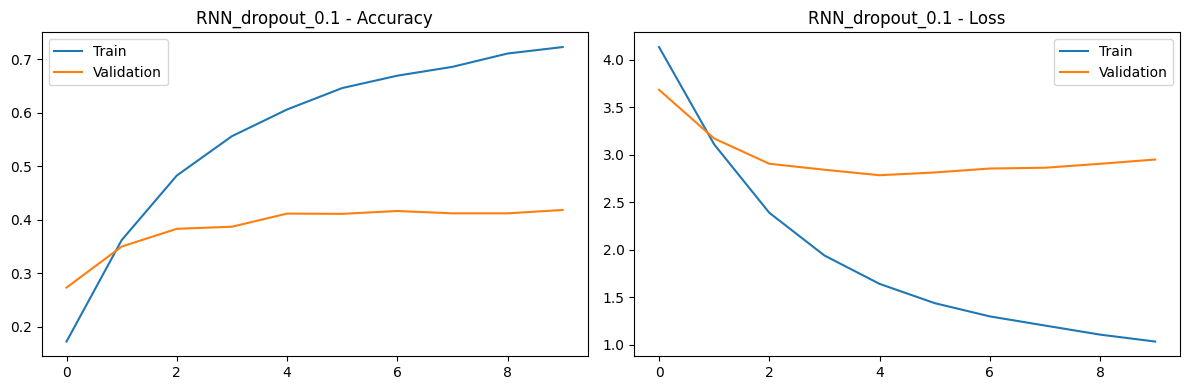

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


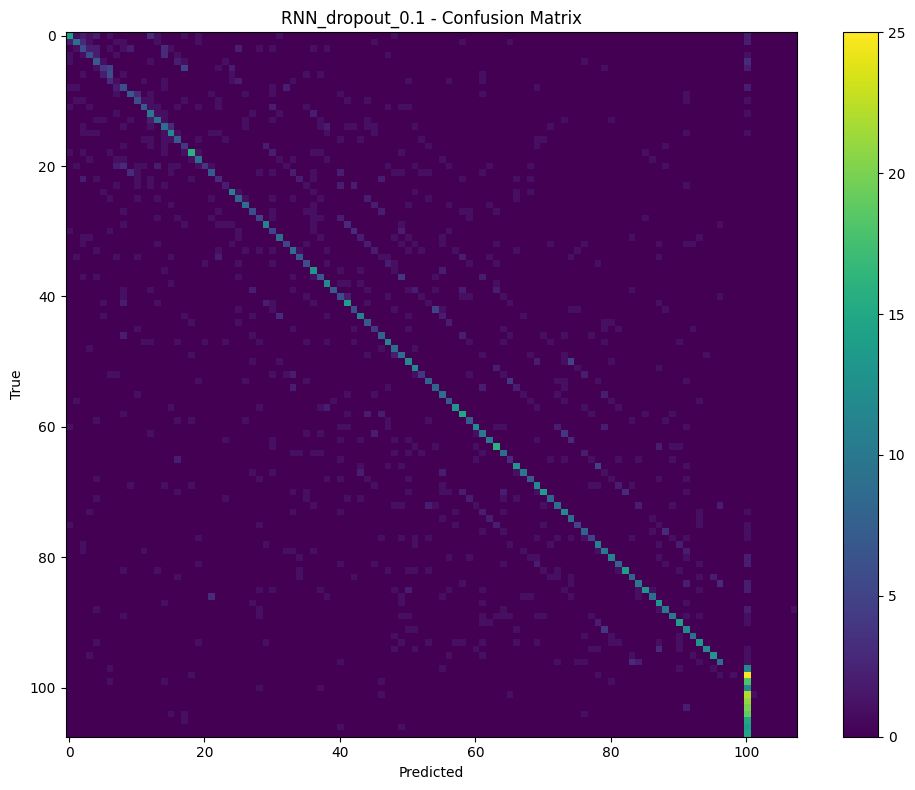


Training LSTM_dropout_0.1...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1120 - loss: 4.3580 - val_accuracy: 0.3409 - val_loss: 2.9615
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4616 - loss: 2.2700 - val_accuracy: 0.4446 - val_loss: 2.4138
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6568 - loss: 1.3431 - val_accuracy: 0.4624 - val_loss: 2.4459
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7263 - loss: 0.9976 - val_accuracy: 0.4735 - val_loss: 2.5774
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7674 - loss: 0.8188 - val_accuracy: 0.4696 - val_loss: 2.7134
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7917 - loss: 0.7136 - val_accuracy: 0.4744 - val_loss: 2.8858
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8111 - loss: 0.6533 - val_accuracy: 0.4648 - val_loss: 2.9214
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4268 - loss: 2.4908


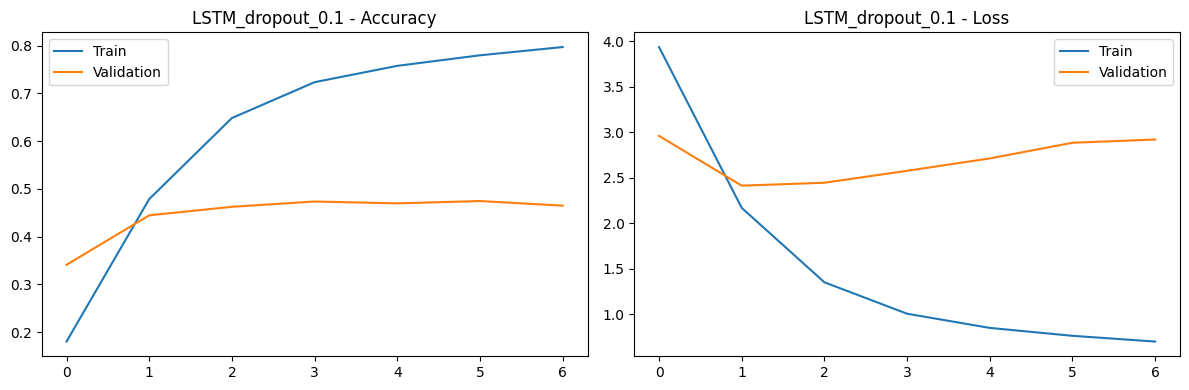

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


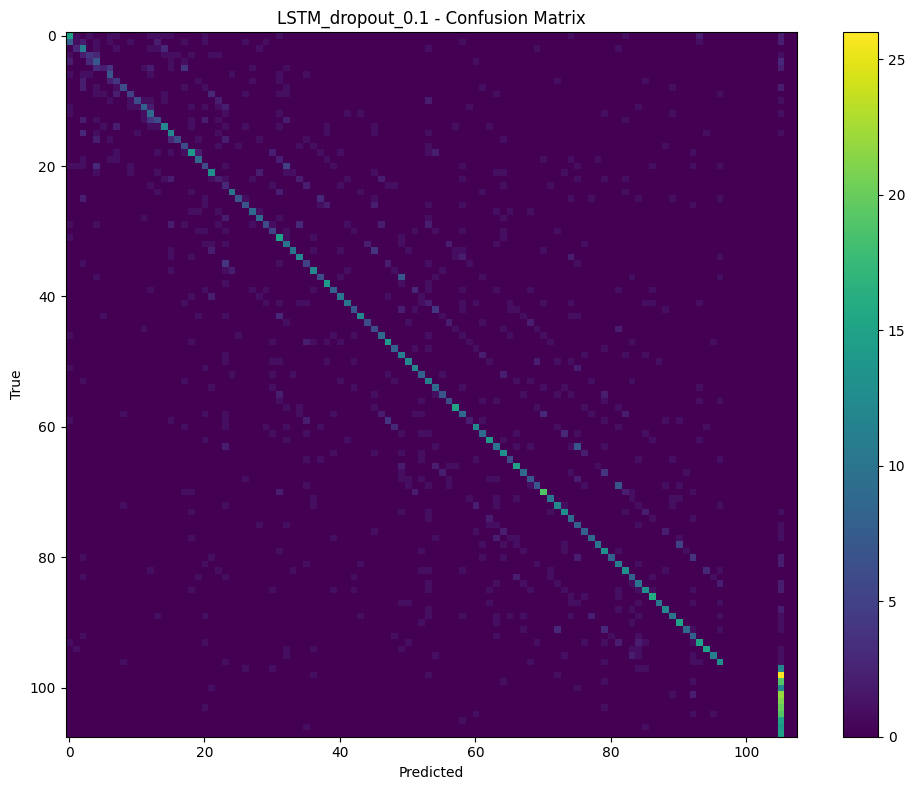


Training GRU_dropout_0.1...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1394 - loss: 4.2905 - val_accuracy: 0.3496 - val_loss: 2.9804
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4899 - loss: 2.2146 - val_accuracy: 0.4499 - val_loss: 2.4008
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6644 - loss: 1.3065 - val_accuracy: 0.4653 - val_loss: 2.4404
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7481 - loss: 0.9433 - val_accuracy: 0.4759 - val_loss: 2.5854
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7895 - loss: 0.7745 - val_accuracy: 0.4822 - val_loss: 2.7158
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8098 - loss: 0.6761 - val_accuracy: 0.4740 - val_loss: 2.8155
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8135 - loss: 0.6519 - val_accuracy: 0.4653 - val_loss: 2.9338
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4449 - loss: 2.5556


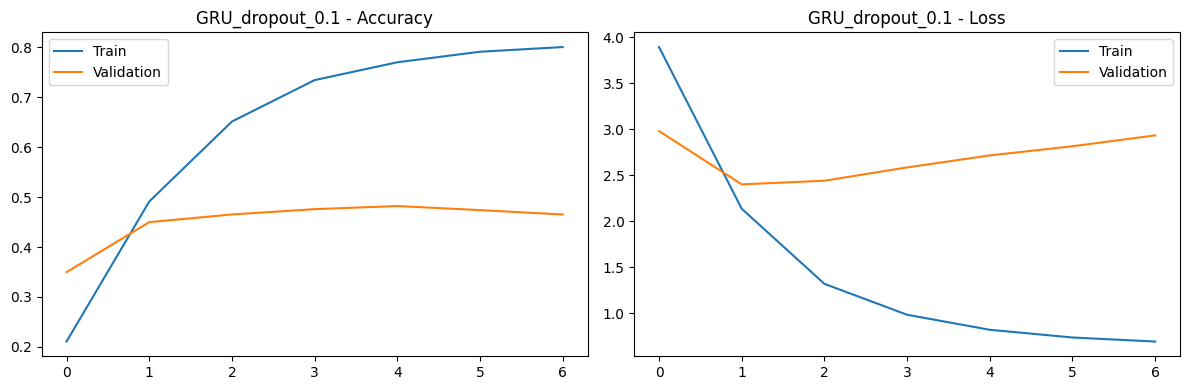

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


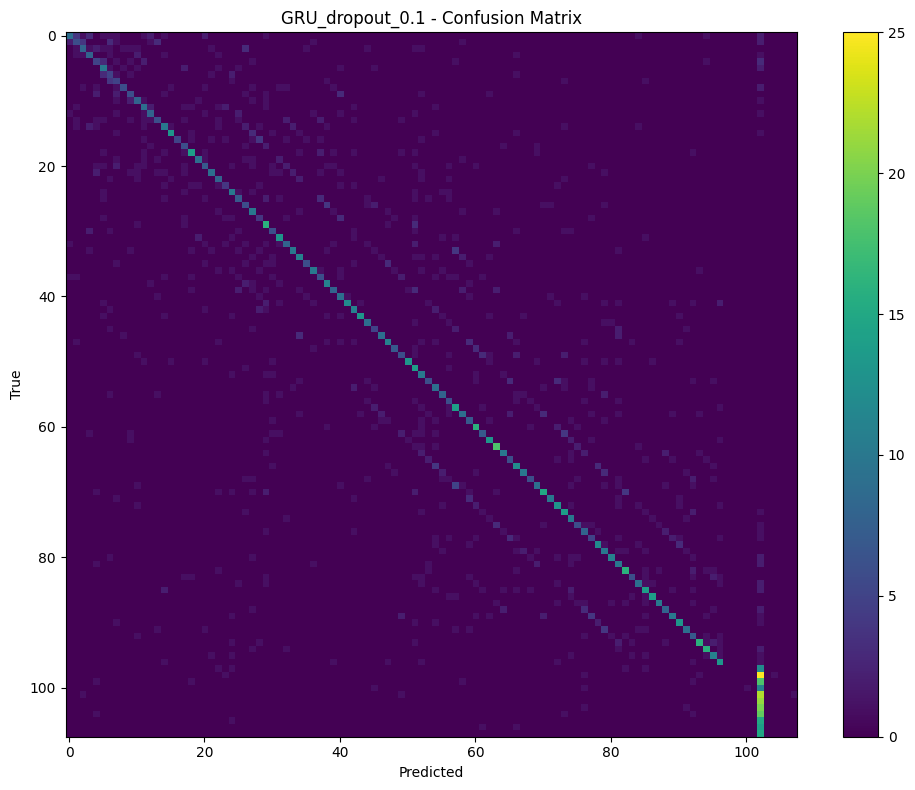


=== Training models with dropout rate: 0.2 ===

Training RNN_dropout_0.2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.0749 - loss: 4.4743 - val_accuracy: 0.2493 - val_loss: 3.9002
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2666 - loss: 3.6091 - val_accuracy: 0.3009 - val_loss: 3.4770
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3695 - loss: 3.0133 - val_accuracy: 0.3568 - val_loss: 3.1095
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4340 - loss: 2.5630 - val_accuracy: 0.3843 - val_loss: 2.8999
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4943 - loss: 2.2406 - val_accuracy: 0.3968 - val_loss: 2.7611
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5216 - loss: 2.0185 - val_accuracy: 0.4108 - val_loss: 2.7113
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5479 - loss: 1.8533 - val_accuracy: 0.4147 - val_loss: 2.6784
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5822 - loss: 1.6954 - val_accuracy: 

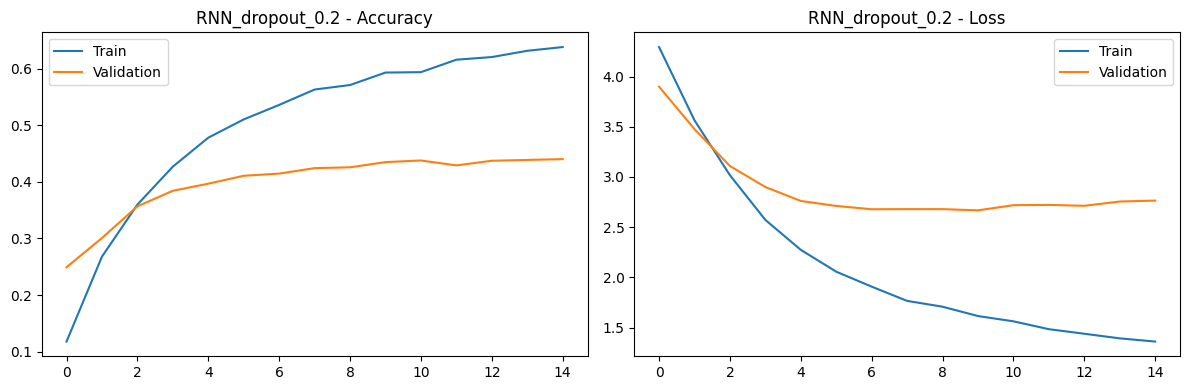

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


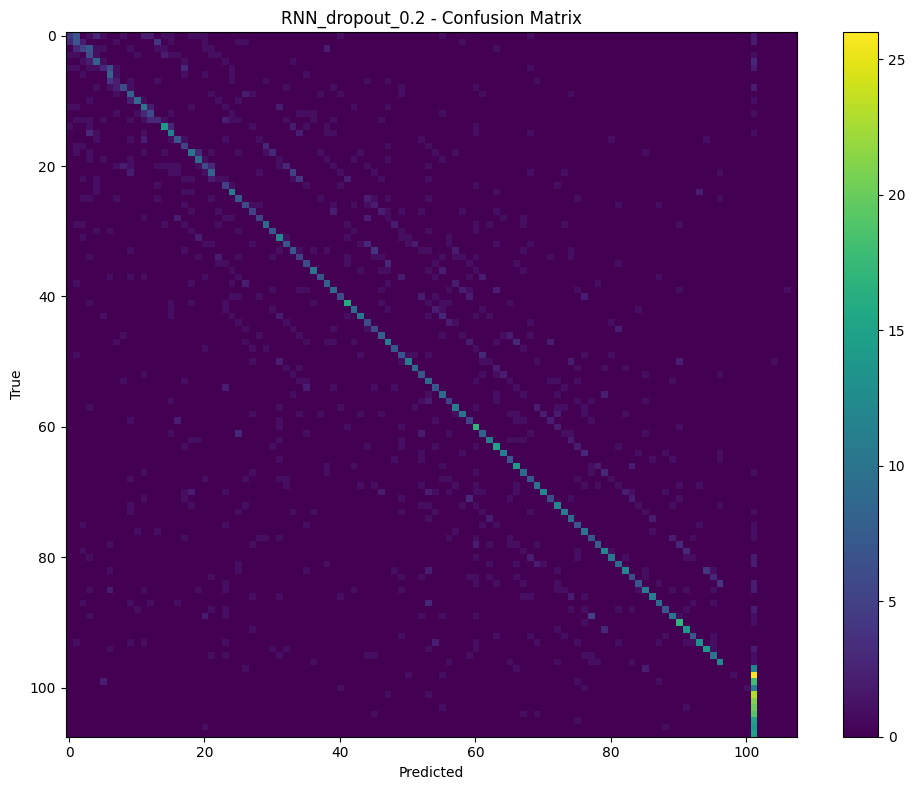


Training LSTM_dropout_0.2...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.0729 - loss: 4.4343 - val_accuracy: 0.2787 - val_loss: 3.2562
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3629 - loss: 2.7213 - val_accuracy: 0.4122 - val_loss: 2.4863
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5504 - loss: 1.7437 - val_accuracy: 0.4465 - val_loss: 2.4011
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6407 - loss: 1.3144 - val_accuracy: 0.4561 - val_loss: 2.4892
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6839 - loss: 1.1202 - val_accuracy: 0.4561 - val_loss: 2.5594
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7039 - loss: 1.0422 - val_accuracy: 0.4634 - val_loss: 2.6654
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7414 - loss: 0.8938 - val_accuracy: 0.4662 - val_loss: 2.6765
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7342 -

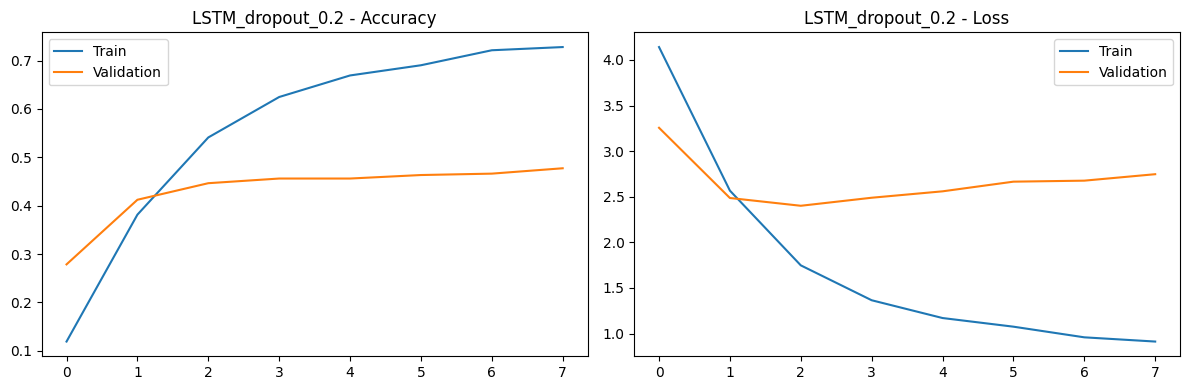

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


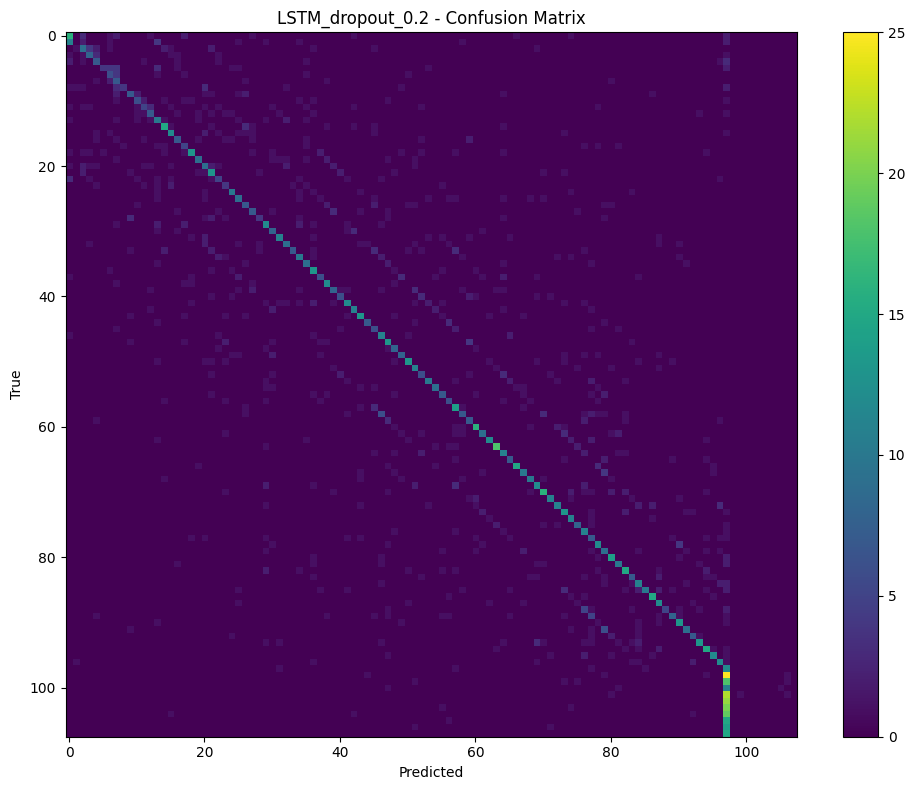


Training GRU_dropout_0.2...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0995 - loss: 4.3803 - val_accuracy: 0.3124 - val_loss: 3.2602
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3880 - loss: 2.7222 - val_accuracy: 0.4248 - val_loss: 2.5132
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5569 - loss: 1.7153 - val_accuracy: 0.4402 - val_loss: 2.4654
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6475 - loss: 1.2973 - val_accuracy: 0.4643 - val_loss: 2.5220
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6804 - loss: 1.1516 - val_accuracy: 0.4720 - val_loss: 2.5489
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7049 - loss: 1.0361 - val_accuracy: 0.4725 - val_loss: 2.6246
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7298 - loss: 0.9356 - val_accuracy: 0.4744 - val_loss: 2.6930
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7593 - l

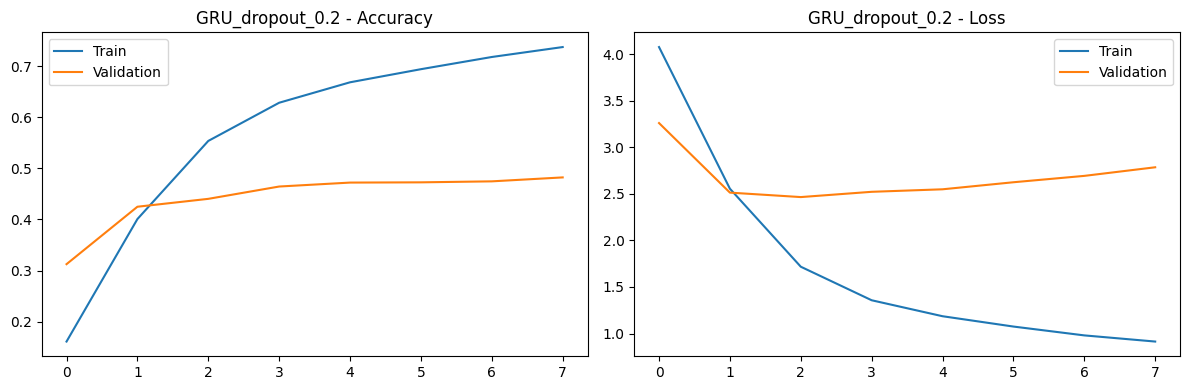

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


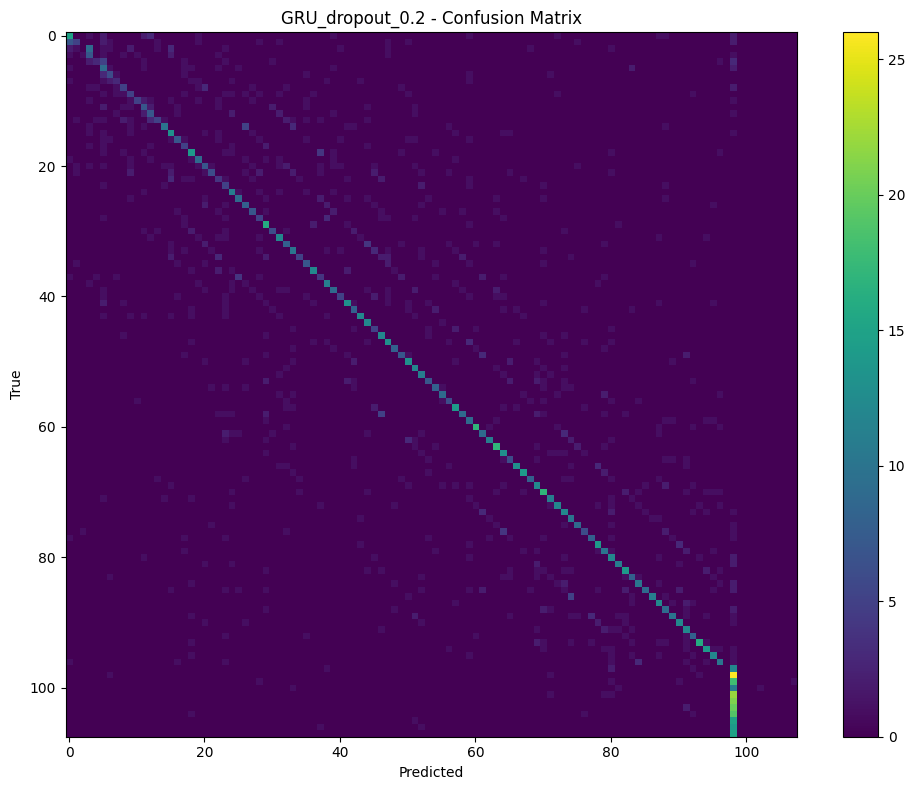


=== Training models with dropout rate: 0.3 ===

Training RNN_dropout_0.3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0522 - loss: 4.5472 - val_accuracy: 0.2194 - val_loss: 4.0571
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1745 - loss: 3.9779 - val_accuracy: 0.2599 - val_loss: 3.7257
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2514 - loss: 3.5371 - val_accuracy: 0.2989 - val_loss: 3.4537
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3040 - loss: 3.1992 - val_accuracy: 0.3105 - val_loss: 3.2448
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3361 - loss: 2.9400 - val_accuracy: 0.3346 - val_loss: 3.0792
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3728 - loss: 2.7480 - val_accuracy: 0.3611 - val_loss: 2.9457
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3960 - loss: 2.5724 - val_accuracy: 0.3669 - val_loss: 2.8894
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4283 - loss: 2.4210 - val_accuracy: 

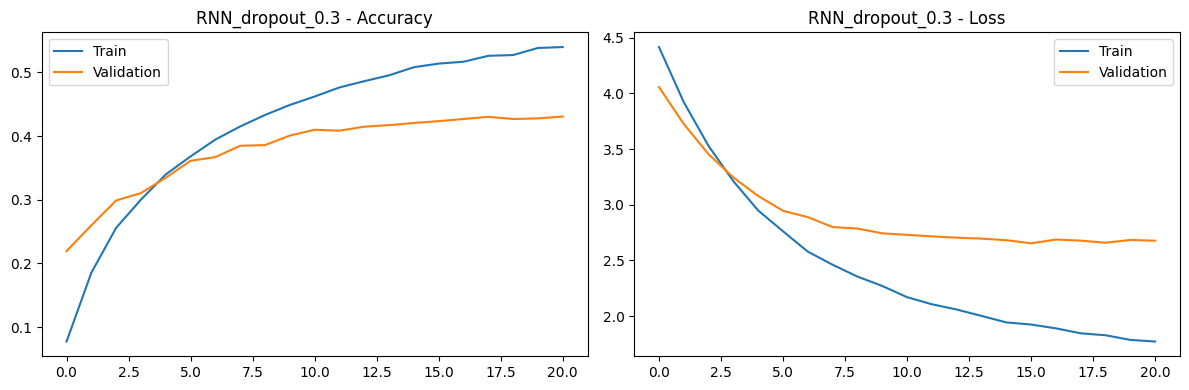

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


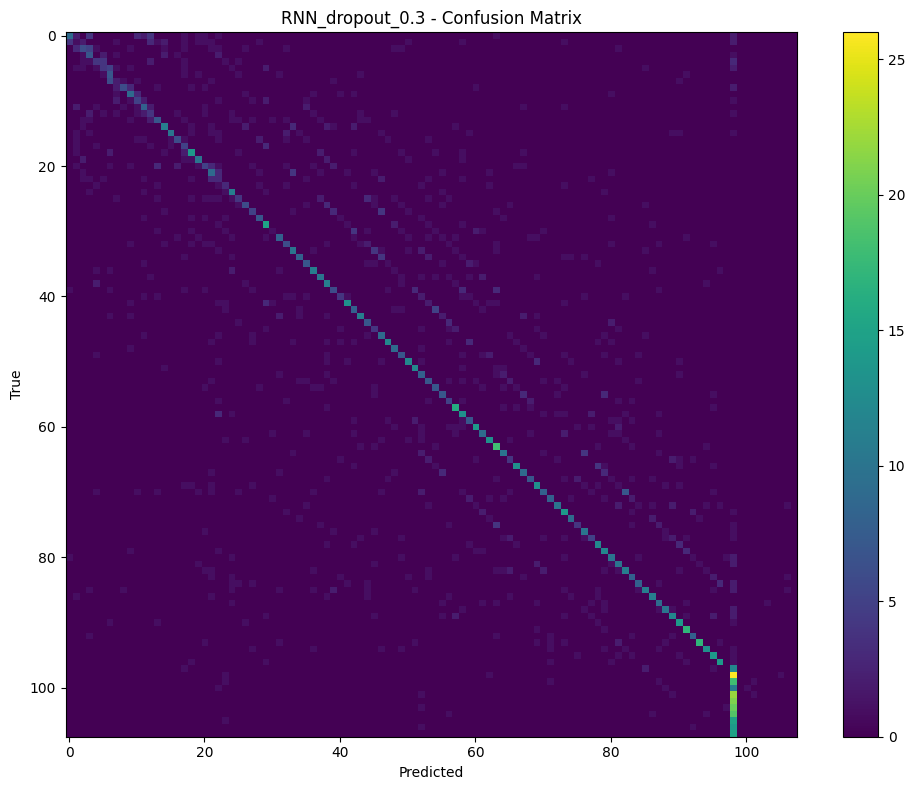


Training LSTM_dropout_0.3...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.0613 - loss: 4.4953 - val_accuracy: 0.2502 - val_loss: 3.4358
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2702 - loss: 3.0417 - val_accuracy: 0.3799 - val_loss: 2.6415
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4295 - loss: 2.1590 - val_accuracy: 0.4248 - val_loss: 2.4389
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5141 - loss: 1.7488 - val_accuracy: 0.4359 - val_loss: 2.4436
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5511 - loss: 1.5769 - val_accuracy: 0.4566 - val_loss: 2.4565
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6035 - loss: 1.3796 - val_accuracy: 0.4677 - val_loss: 2.5189
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6283 - loss: 1.2971 - val_accuracy: 0.4802 - val_loss: 2.5445
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6435 -

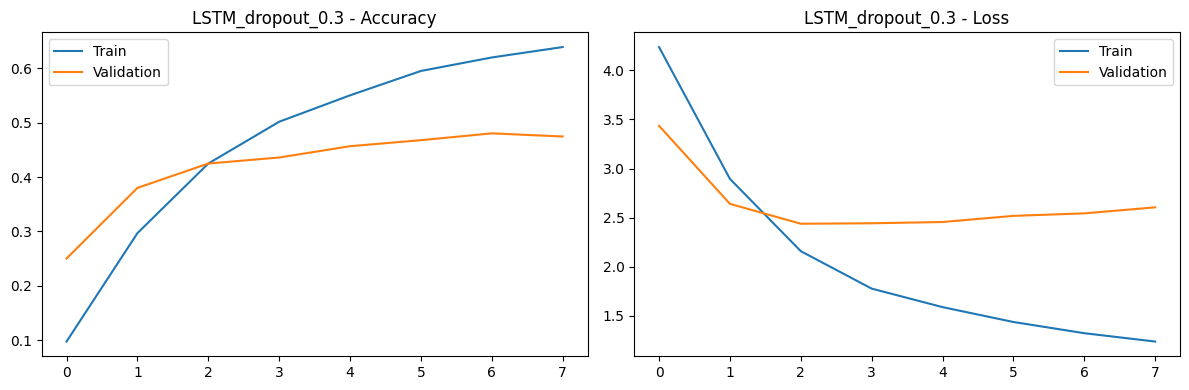

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


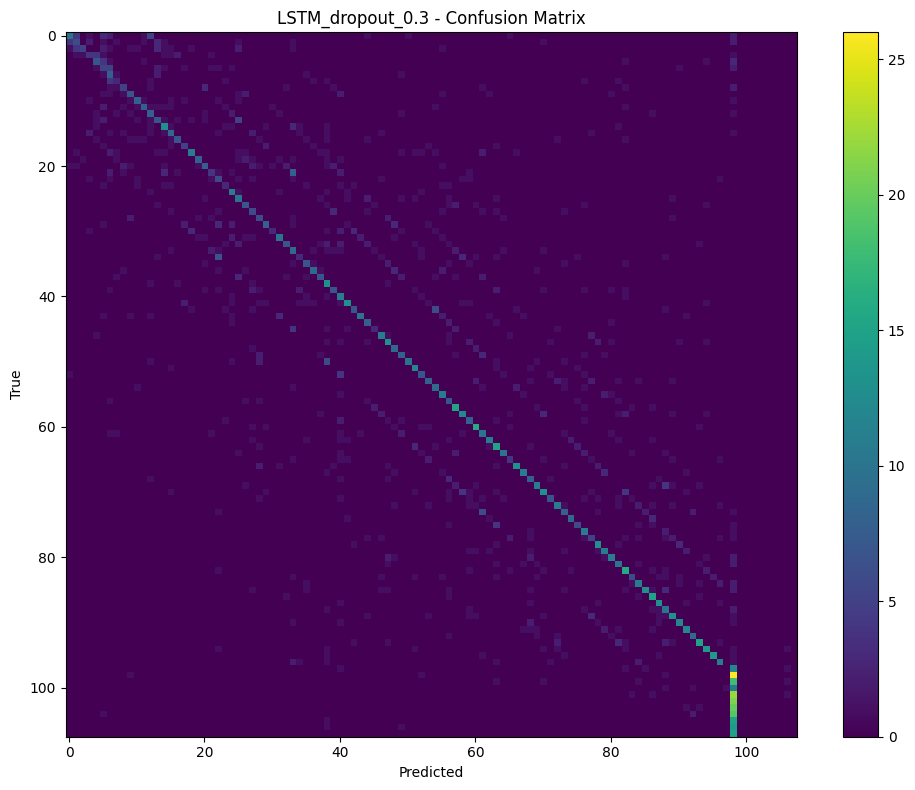


Training GRU_dropout_0.3...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0719 - loss: 4.4518 - val_accuracy: 0.2599 - val_loss: 3.6251
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2694 - loss: 3.2168 - val_accuracy: 0.3819 - val_loss: 2.7198
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4380 - loss: 2.2267 - val_accuracy: 0.4325 - val_loss: 2.4622
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5049 - loss: 1.8419 - val_accuracy: 0.4571 - val_loss: 2.4032
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5704 - loss: 1.5594 - val_accuracy: 0.4532 - val_loss: 2.4025
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5998 - loss: 1.4142 - val_accuracy: 0.4638 - val_loss: 2.4242
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6240 - loss: 1.3273 - val_accuracy: 0.4682 - val_loss: 2.5107
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6436 - l

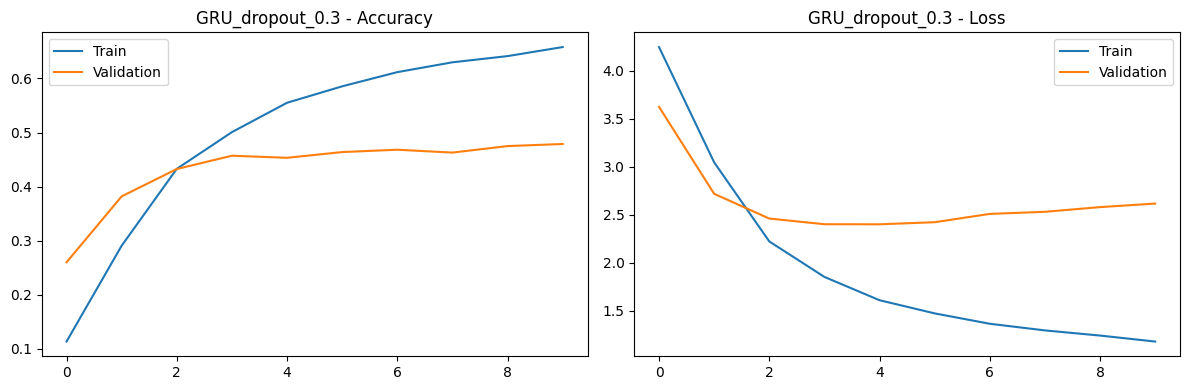

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


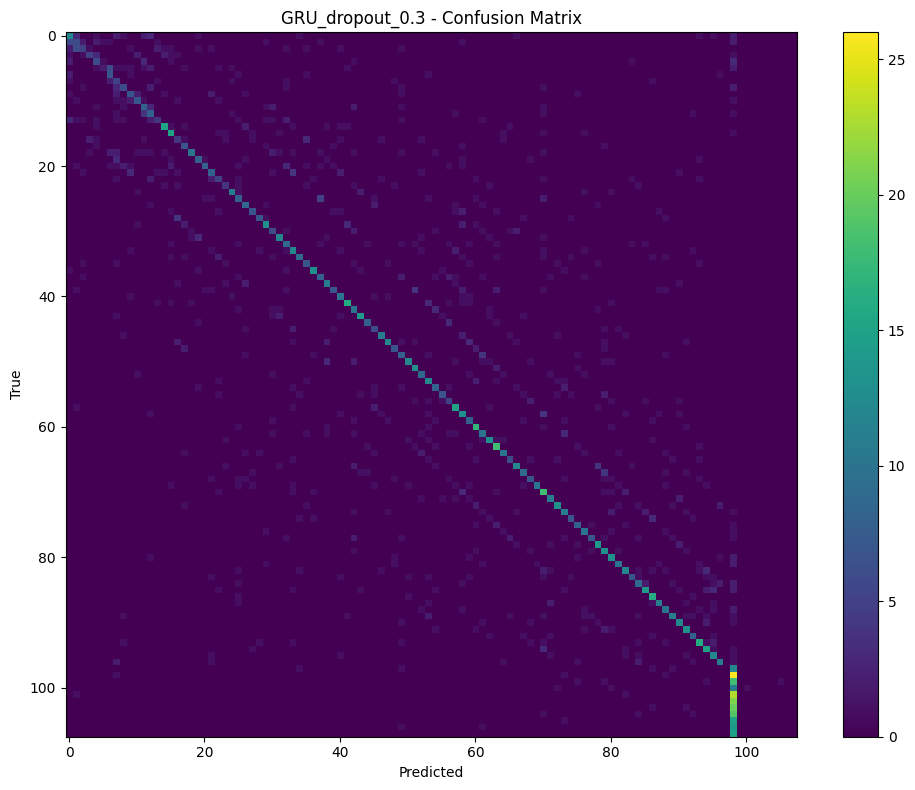


=== Training models with dropout rate: 0.4 ===

Training RNN_dropout_0.4...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.0274 - loss: 4.6502 - val_accuracy: 0.1688 - val_loss: 4.1977
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0879 - loss: 4.2657 - val_accuracy: 0.2213 - val_loss: 3.9943
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1519 - loss: 4.0157 - val_accuracy: 0.2512 - val_loss: 3.8123
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1874 - loss: 3.8045 - val_accuracy: 0.2604 - val_loss: 3.6614
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2154 - loss: 3.6461 - val_accuracy: 0.2893 - val_loss: 3.5239
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2381 - loss: 3.4721 - val_accuracy: 0.2912 - val_loss: 3.3859
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2597 - loss: 3.3090 - val_accuracy: 0.2999 - val_loss: 3.2501
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2820 - loss: 3.2003 - val_accuracy: 

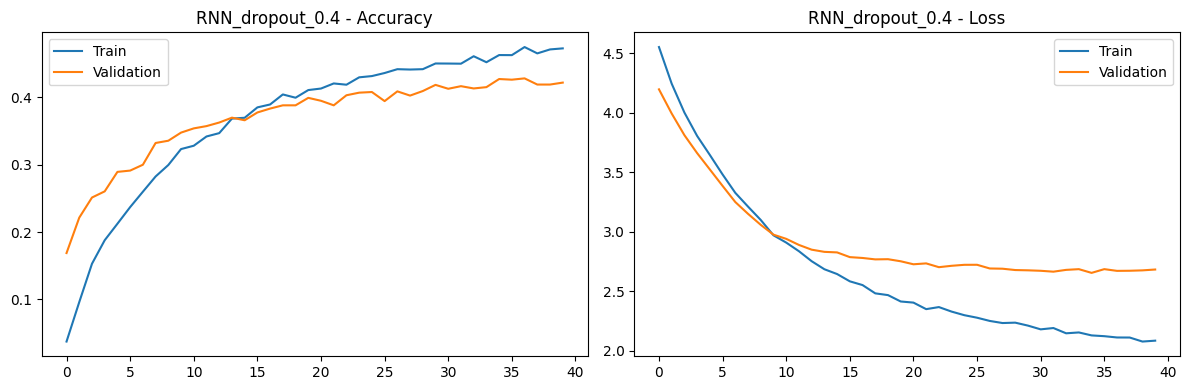

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


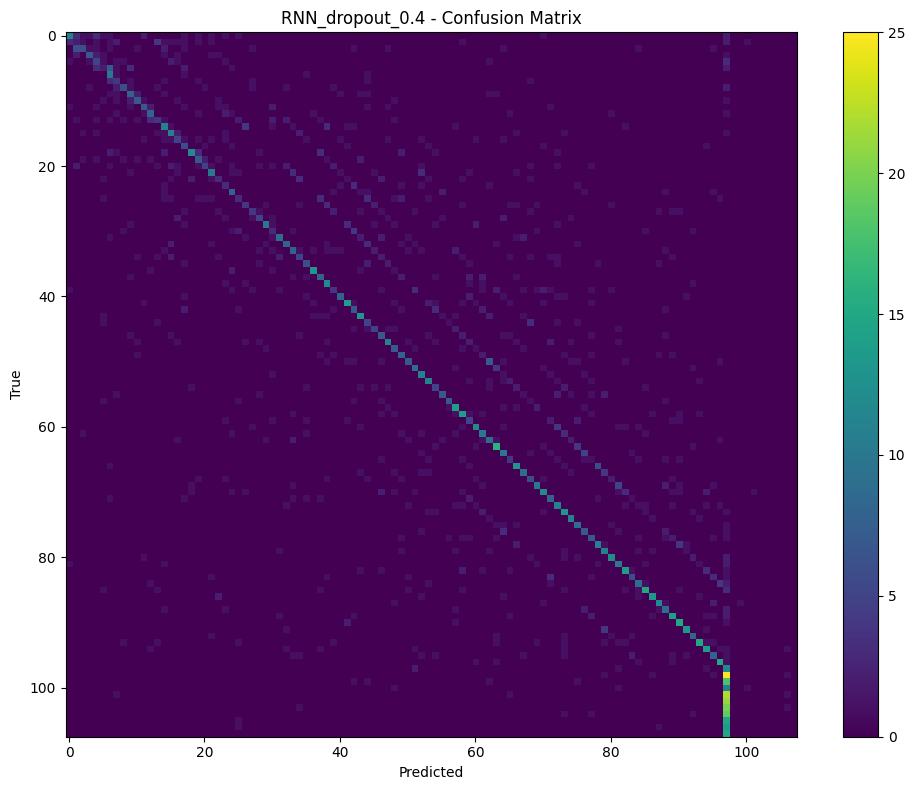


Training LSTM_dropout_0.4...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0335 - loss: 4.5527 - val_accuracy: 0.1716 - val_loss: 3.9759
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1608 - loss: 3.6758 - val_accuracy: 0.3476 - val_loss: 2.9212
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2944 - loss: 2.7473 - val_accuracy: 0.3973 - val_loss: 2.5929
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3766 - loss: 2.3371 - val_accuracy: 0.4282 - val_loss: 2.4772
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4235 - loss: 2.0998 - val_accuracy: 0.4417 - val_loss: 2.4195
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4657 - loss: 1.9009 - val_accuracy: 0.4581 - val_loss: 2.3743
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4940 - loss: 1.7890 - val_accuracy: 0.4590 - val_loss: 2.3816
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5198 -

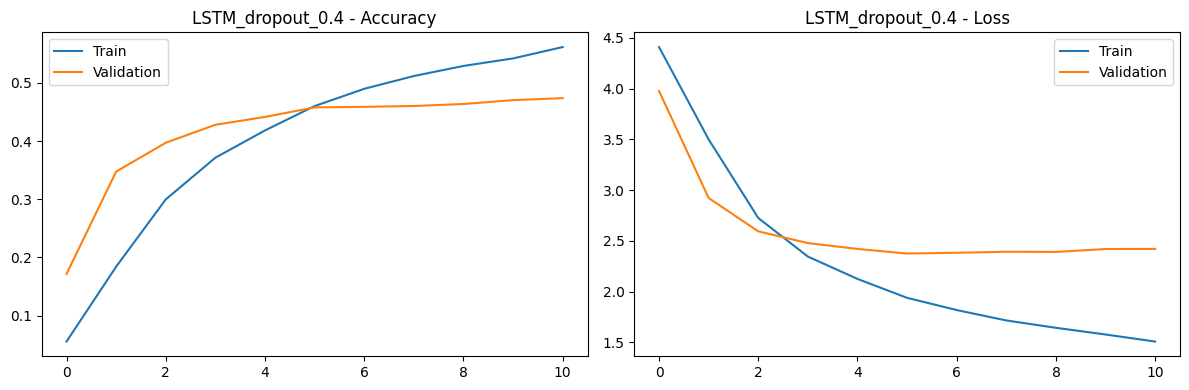

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


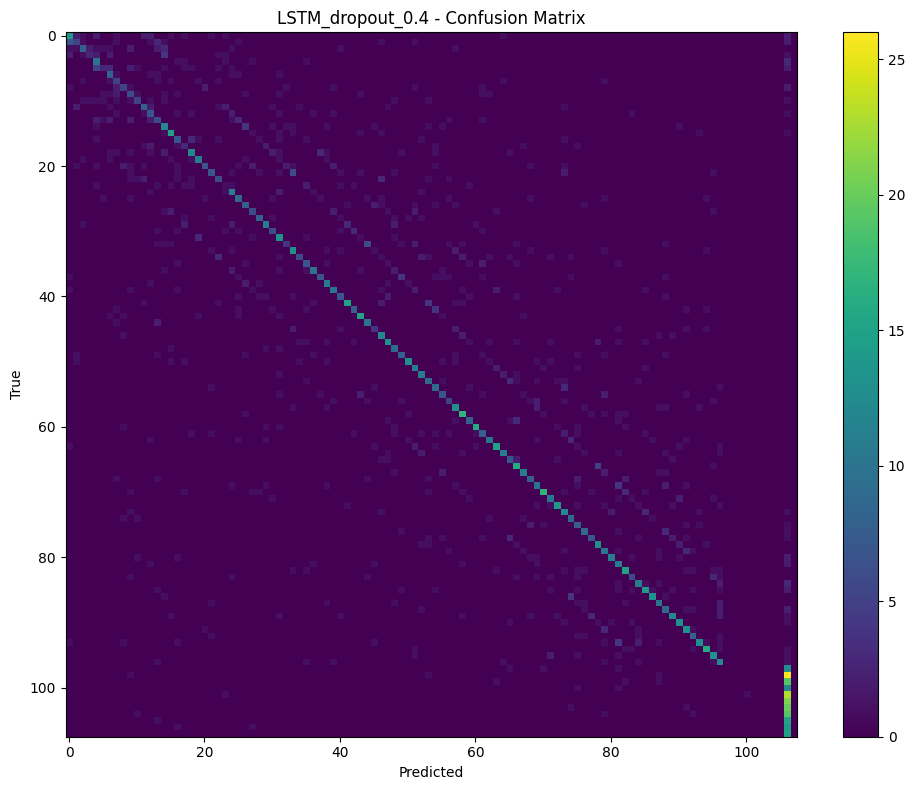


Training GRU_dropout_0.4...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0373 - loss: 4.5293 - val_accuracy: 0.2334 - val_loss: 3.9465
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1758 - loss: 3.7065 - val_accuracy: 0.3404 - val_loss: 2.9932
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2845 - loss: 2.8462 - val_accuracy: 0.3973 - val_loss: 2.6120
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3694 - loss: 2.4211 - val_accuracy: 0.4195 - val_loss: 2.4759
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4095 - loss: 2.1567 - val_accuracy: 0.4436 - val_loss: 2.4095
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4463 - loss: 1.9958 - val_accuracy: 0.4513 - val_loss: 2.3937
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4818 - loss: 1.8684 - val_accuracy: 0.4518 - val_loss: 2.4126
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4988 - l

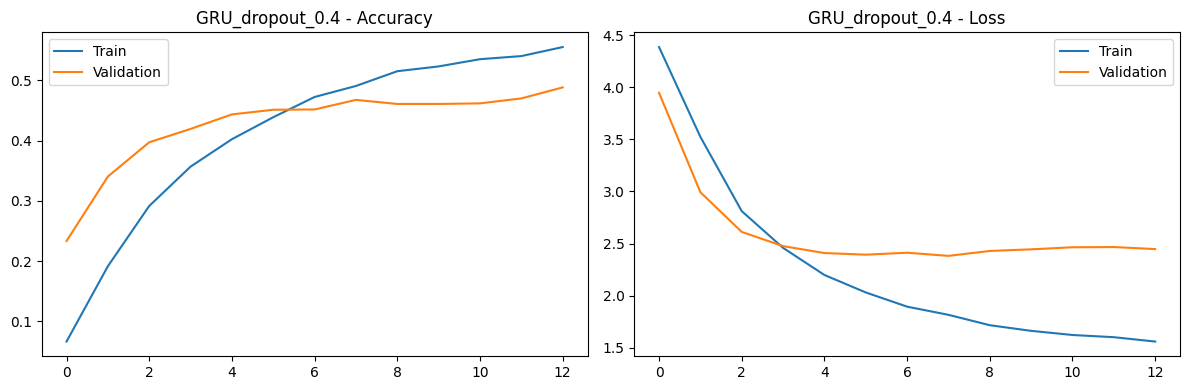

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


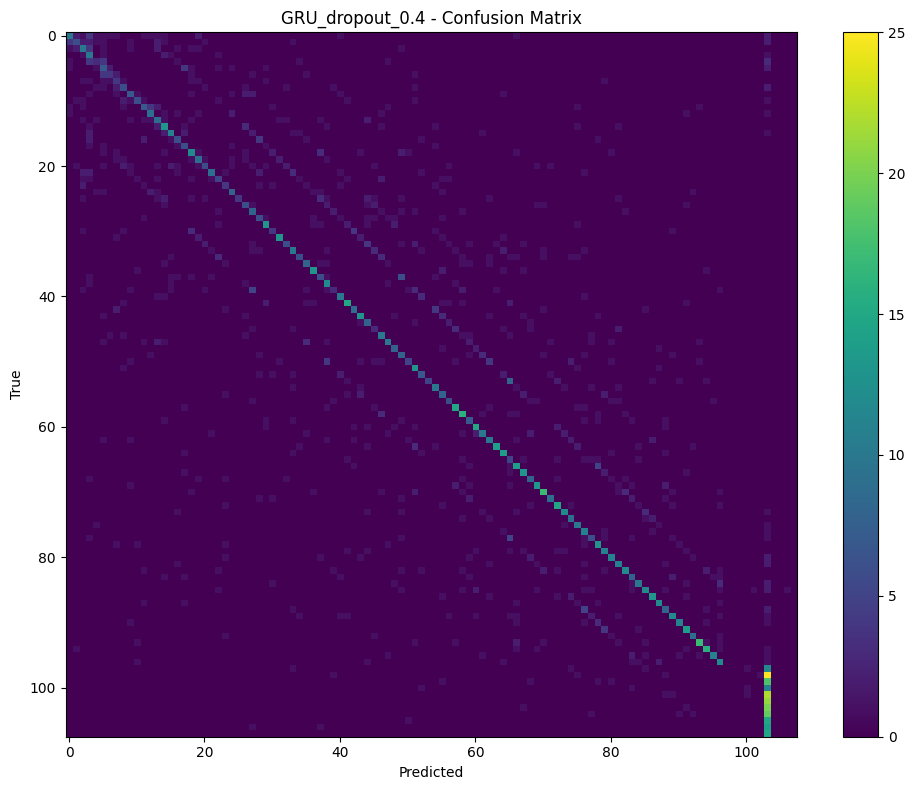


=== Training models with dropout rate: 0.5 ===

Training RNN_dropout_0.5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0155 - loss: 4.7744 - val_accuracy: 0.1287 - val_loss: 4.3201
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0413 - loss: 4.4788 - val_accuracy: 0.1789 - val_loss: 4.2147
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0644 - loss: 4.3433 - val_accuracy: 0.2059 - val_loss: 4.1187
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0856 - loss: 4.2433 - val_accuracy: 0.2078 - val_loss: 4.0251
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1036 - loss: 4.1174 - val_accuracy: 0.2189 - val_loss: 3.9376
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1283 - loss: 4.0478 - val_accuracy: 0.2252 - val_loss: 3.8414
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1465 - loss: 3.9164 - val_accuracy: 0.2454 - val_loss: 3.7554
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1514 - loss: 3.8883 - val_accuracy: 

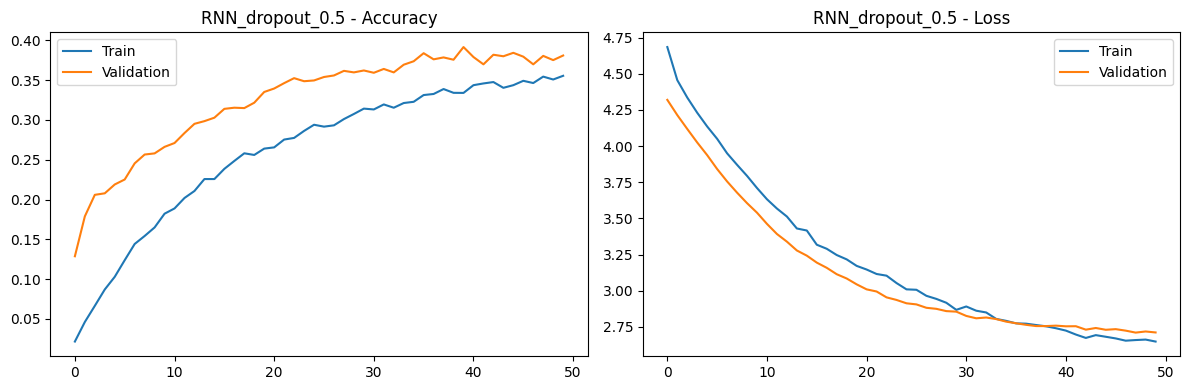

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


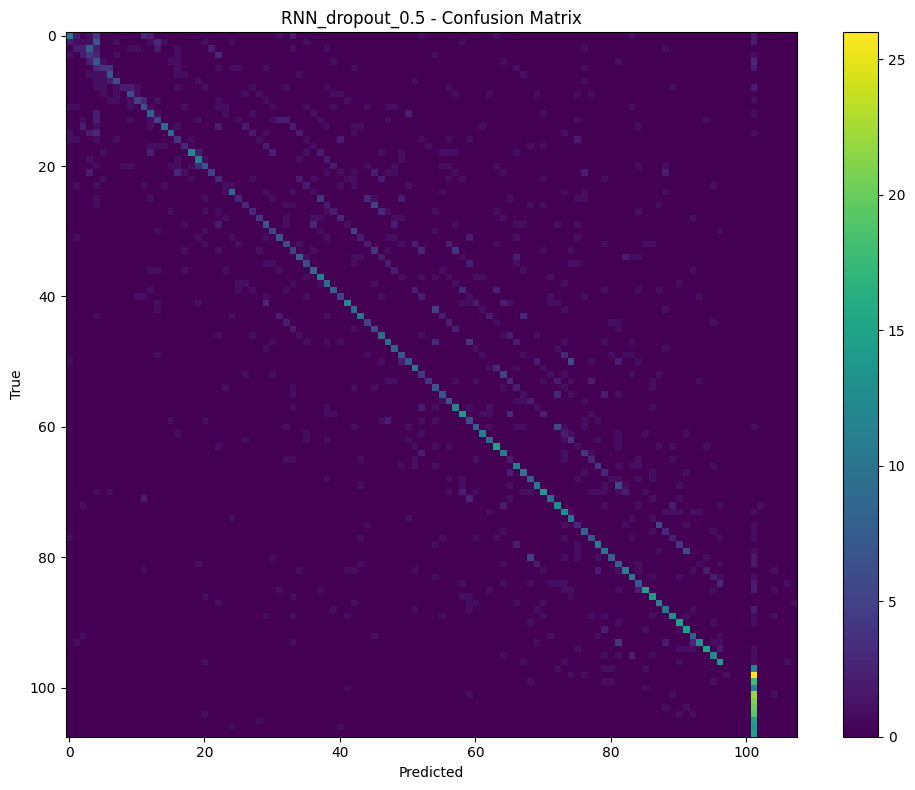


Training LSTM_dropout_0.5...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0215 - loss: 4.5944 - val_accuracy: 0.1268 - val_loss: 4.2721
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0811 - loss: 4.1359 - val_accuracy: 0.2314 - val_loss: 3.4469
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1633 - loss: 3.4366 - val_accuracy: 0.3182 - val_loss: 2.9367
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2201 - loss: 3.0080 - val_accuracy: 0.3693 - val_loss: 2.7159
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2549 - loss: 2.7619 - val_accuracy: 0.3804 - val_loss: 2.6110
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2978 - loss: 2.5688 - val_accuracy: 0.3939 - val_loss: 2.5525
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3148 - loss: 2.4296 - val_accuracy: 0.4166 - val_loss: 2.4918
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3441 -

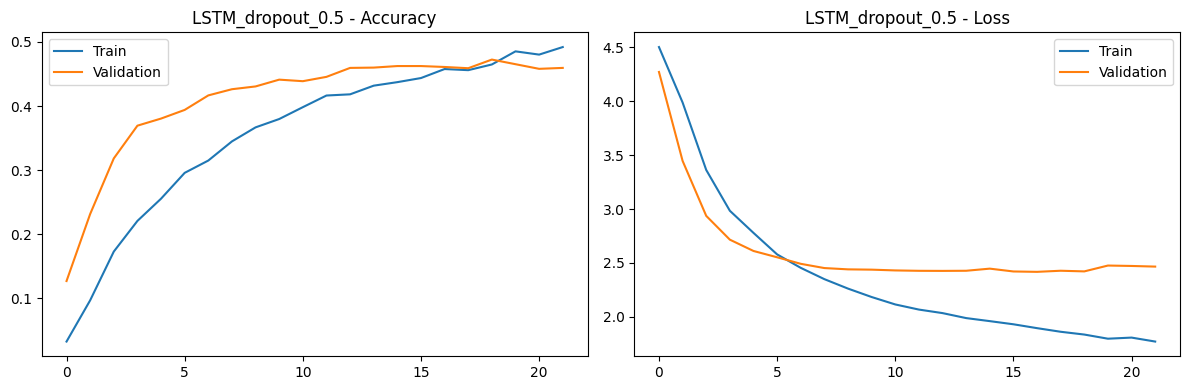

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


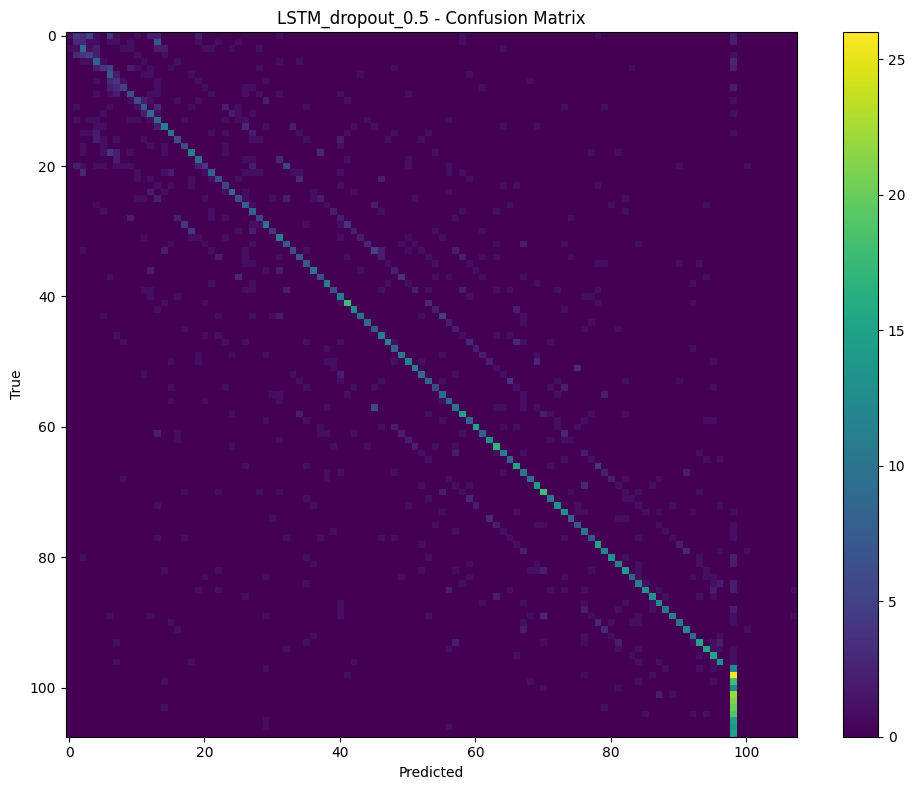


Training GRU_dropout_0.5...
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0216 - loss: 4.5943 - val_accuracy: 0.1741 - val_loss: 4.2267
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0824 - loss: 4.1877 - val_accuracy: 0.2604 - val_loss: 3.6392
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1537 - loss: 3.6492 - val_accuracy: 0.3211 - val_loss: 3.0982
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2057 - loss: 3.2289 - val_accuracy: 0.3674 - val_loss: 2.7861
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2376 - loss: 2.9779 - val_accuracy: 0.3833 - val_loss: 2.6313
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2814 - loss: 2.7372 - val_accuracy: 0.3973 - val_loss: 2.5285
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3021 - loss: 2.6073 - val_accuracy: 0.4132 - val_loss: 2.4448
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3307 - l

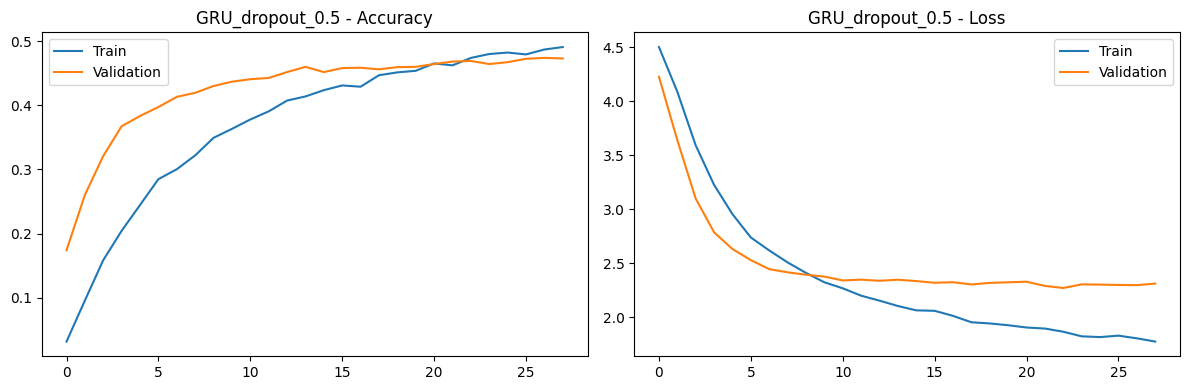

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


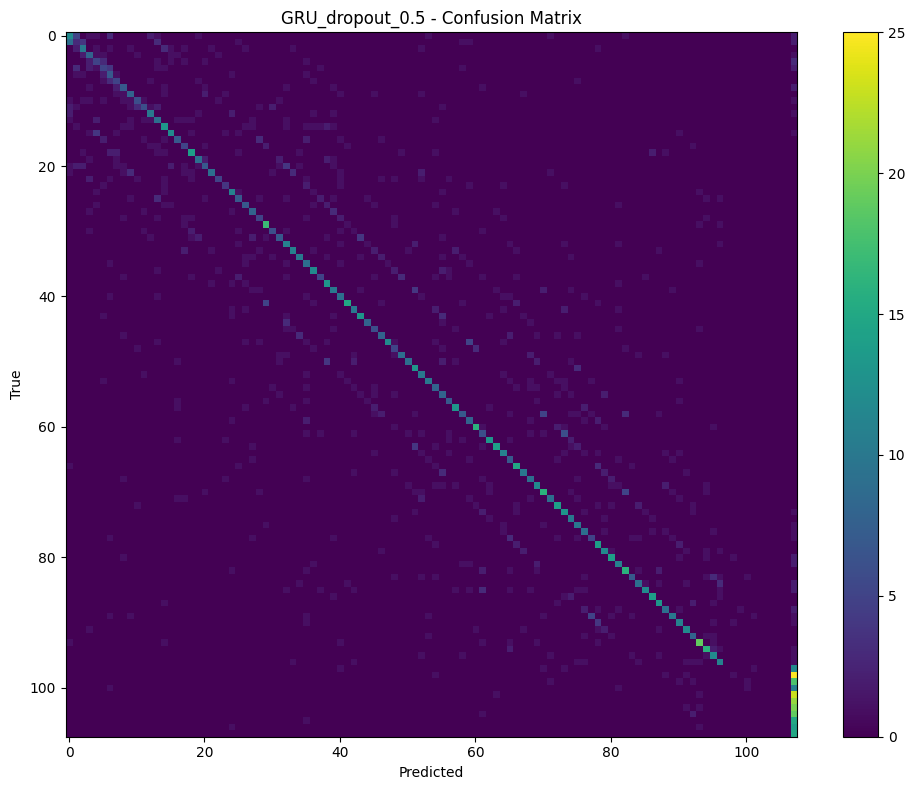


=== Dropout Rate Comparison Results ===
                  dropout_rate model_type  accuracy
GRU_dropout_0.3            0.3        GRU  0.470588
GRU_dropout_0.5            0.5        GRU  0.467213
LSTM_dropout_0.4           0.4       LSTM  0.459499
LSTM_dropout_0.5           0.5       LSTM  0.455641
LSTM_dropout_0.2           0.2       LSTM  0.455159
GRU_dropout_0.2            0.2        GRU  0.453230
GRU_dropout_0.4            0.4        GRU  0.453230
GRU_dropout_0.1            0.1        GRU  0.452748
LSTM_dropout_0.1           0.1       LSTM  0.447445
LSTM_dropout_0.3           0.3       LSTM  0.440694
RNN_dropout_0.3            0.3        RNN  0.427194
RNN_dropout_0.1            0.1        RNN  0.422372
RNN_dropout_0.4            0.4        RNN  0.414176
RNN_dropout_0.2            0.2        RNN  0.413693
RNN_dropout_0.5            0.5        RNN  0.391996


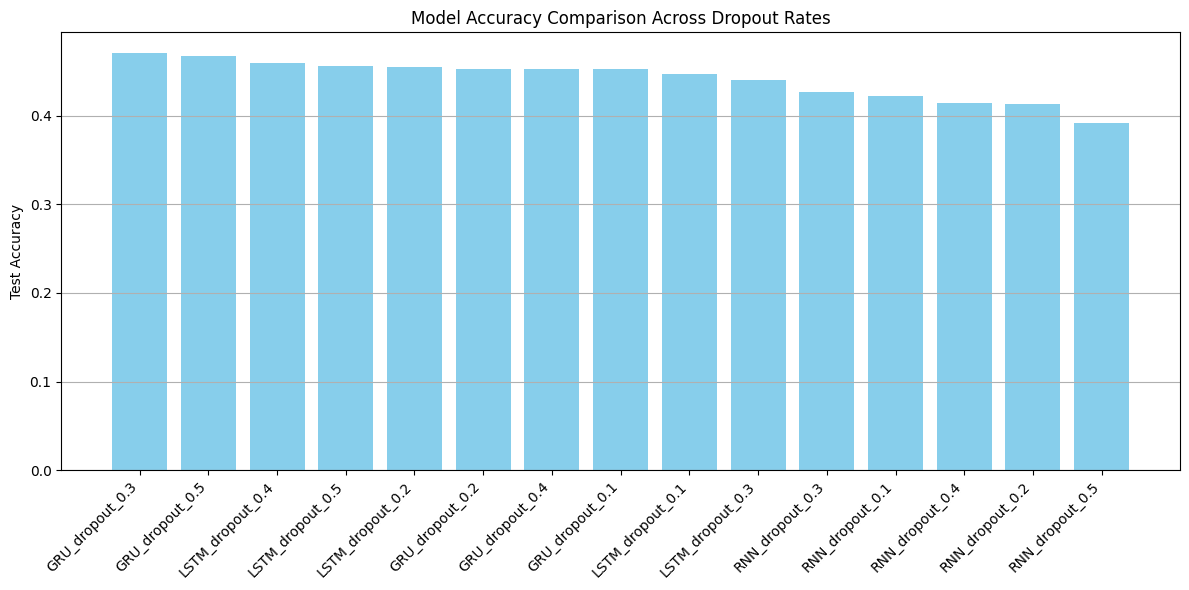

In [6]:
import pandas as pd

def create_models_with_dropout(input_shape, num_classes=108, dropout_rate=0.3):
    models = {}

    # RNN
    rnn_model = Sequential([
        SimpleRNN(128, input_shape=input_shape, return_sequences=True),
        Dropout(dropout_rate),
        SimpleRNN(64),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    models[f'RNN_dropout_{dropout_rate}'] = rnn_model

    # LSTM
    lstm_model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(64),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    models[f'LSTM_dropout_{dropout_rate}'] = lstm_model

    # GRU
    gru_model = Sequential([
        GRU(128, input_shape=input_shape, return_sequences=True),
        Dropout(dropout_rate),
        GRU(64),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    models[f'GRU_dropout_{dropout_rate}'] = gru_model

    return models

# Store all results
all_results = {}

# Try different dropout rates
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

for rate in dropout_rates:
    print(f"\n=== Training models with dropout rate: {rate} ===")
    models = create_models_with_dropout(input_shape, dropout_rate=rate)
    
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        history, acc = train_and_evaluate(
            model, X_train, y_train, X_val, y_val, X_test, y_test, model_name
        )
        all_results[model_name] = {
            'dropout_rate': rate,
            'model_type': model_name.split('_')[0],
            'accuracy': acc
        }

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(all_results, orient='index')
results_df = results_df.sort_values(by='accuracy', ascending=False)

# Display results as a table
print("\n=== Dropout Rate Comparison Results ===")
print(results_df)

# Plot results
plt.figure(figsize=(12, 6))
plt.bar(results_df.index, results_df['accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison Across Dropout Rates')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Analyzing frame length: 35 ms
Training model: GRU_dropout_0.3_35ms
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0191 - loss: 6.1558 - val_accuracy: 0.0694 - val_loss: 4.1855
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0583 - loss: 4.2521 - val_accuracy: 0.1205 - val_loss: 3.9087
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0924 - loss: 3.9423 - val_accuracy: 0.1649 - val_loss: 3.6183
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1264 - loss: 3.6695 - val_accuracy: 0.1996 - val_loss: 3.4145
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1588 - loss: 3.4839 - val_accuracy: 0.2329 - val_loss: 3.2606
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1848 - loss: 3.2820 - val_accuracy: 0.2392 - val_loss: 3.1786
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2133 - loss: 3.1714 - val_accuracy: 0.2541 - val_loss: 3.0947
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2150 - loss: 3.1088 - val_accuracy: 0.2710 - val_

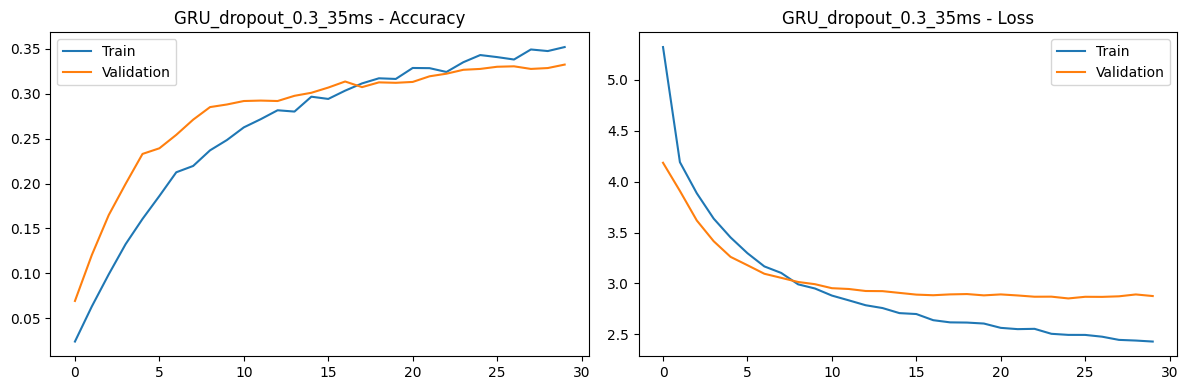

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


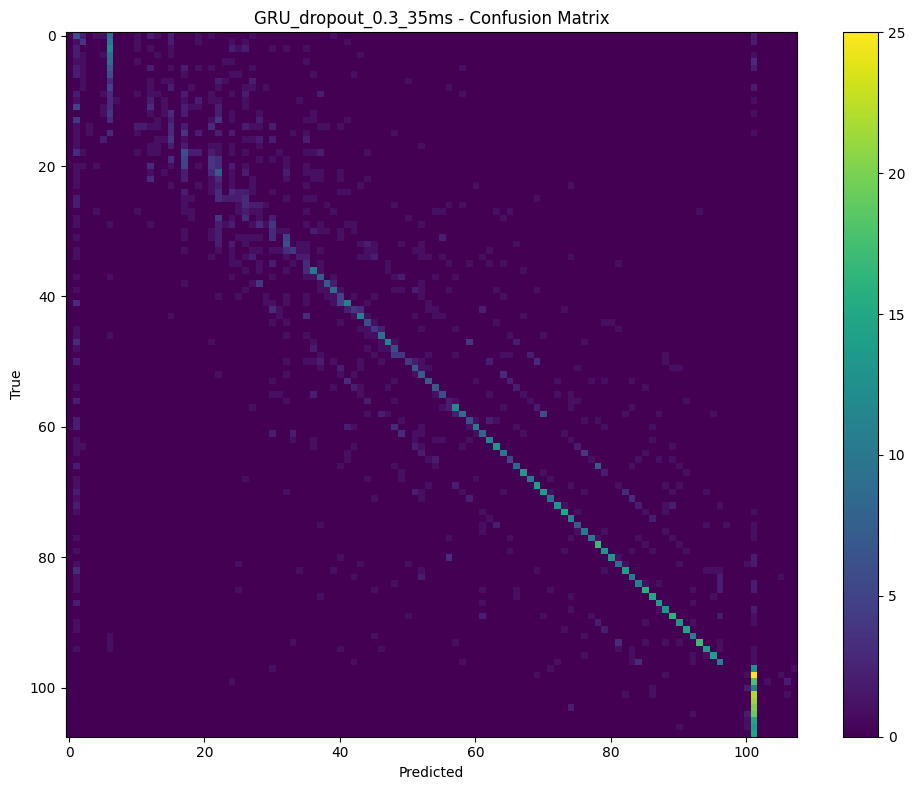


Analyzing frame length: 70 ms


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model: GRU_dropout_0.3_70ms
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.0199 - loss: 6.4808 - val_accuracy: 0.0612 - val_loss: 4.2162
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0458 - loss: 4.3082 - val_accuracy: 0.1123 - val_loss: 3.9903
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0827 - loss: 4.0046 - val_accuracy: 0.1721 - val_loss: 3.6656
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1203 - loss: 3.7085 - val_accuracy: 0.2122 - val_loss: 3.3875
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1597 - loss: 3.4460 - val_accuracy: 0.2541 - val_loss: 3.1746
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1864 - loss: 3.2587 - val_accuracy: 0.2782 - val_loss: 3.0320
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2283 - loss: 3.0112 - val_accuracy: 0.2946 - val_loss: 2.9358
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.

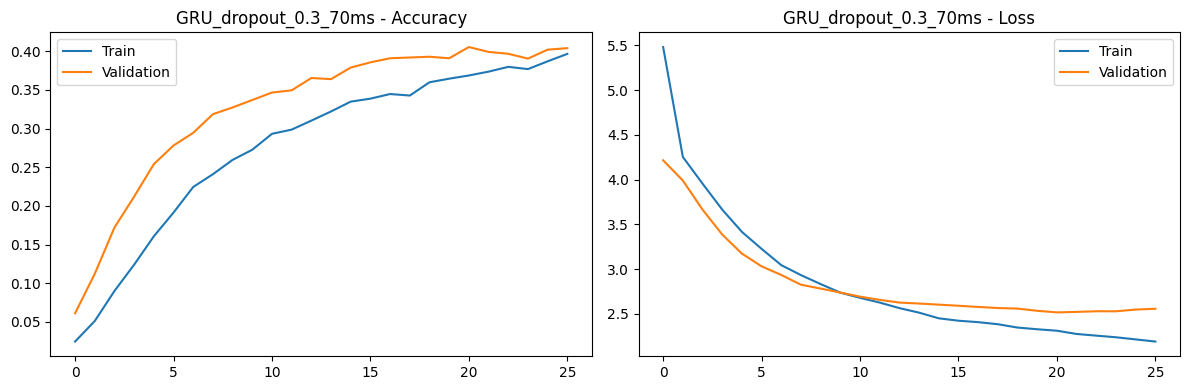

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


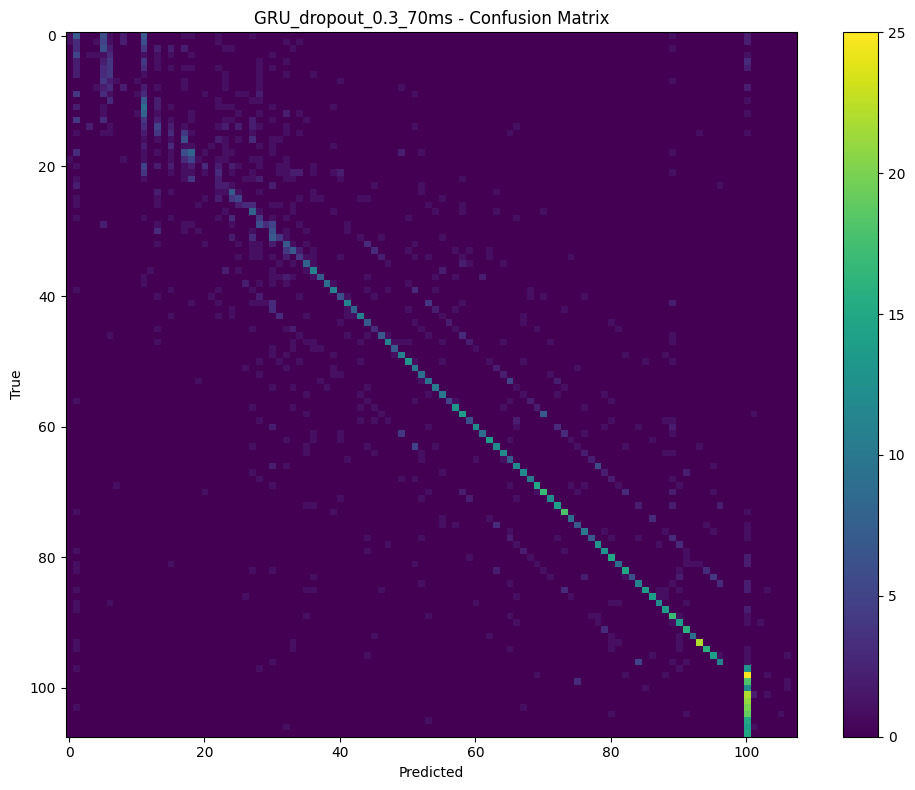


Analyzing frame length: 150 ms


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model: GRU_dropout_0.3_150ms
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0198 - loss: 6.4076 - val_accuracy: 0.0434 - val_loss: 4.2981
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0401 - loss: 4.3828 - val_accuracy: 0.0844 - val_loss: 4.1503
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0611 - loss: 4.1126 - val_accuracy: 0.1495 - val_loss: 3.8413
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1061 - loss: 3.8171 - val_accuracy: 0.2006 - val_loss: 3.4703
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1446 - loss: 3.4713 - val_accuracy: 0.2449 - val_loss: 3.1717
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1875 - loss: 3.2255 - val_accuracy: 0.2854 - val_loss: 2.9703
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2112 - loss: 3.0586 - val_accuracy: 0.3042 - val_loss: 2.8390
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0

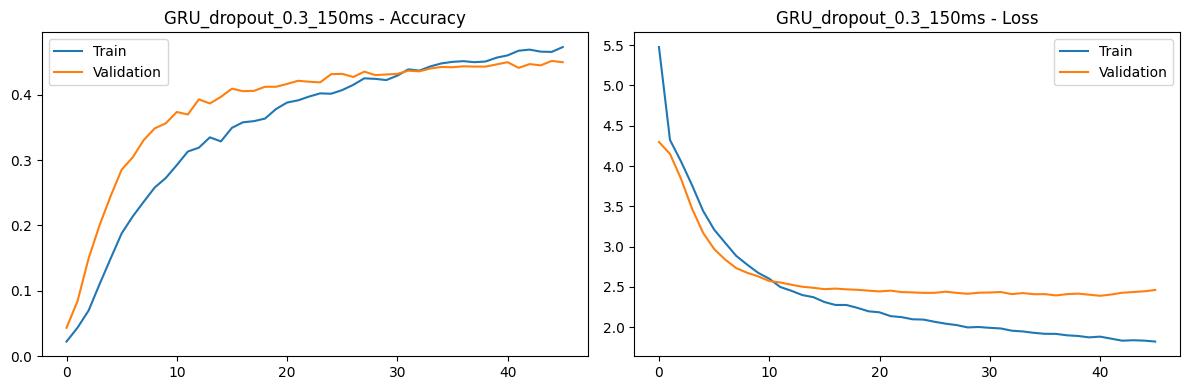

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


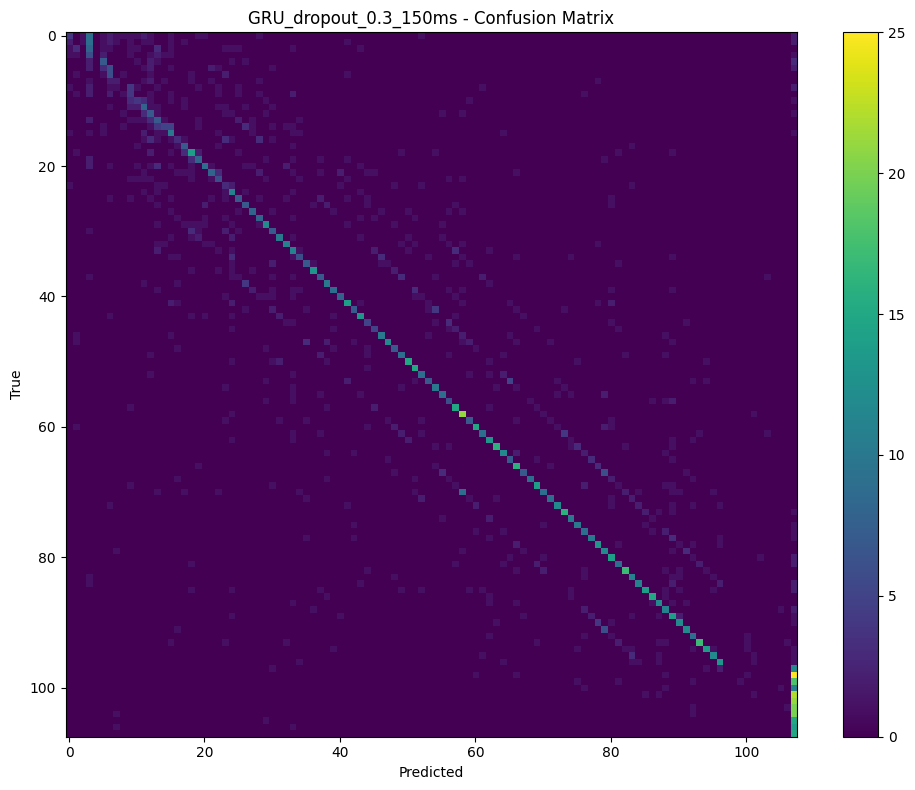


Analyzing frame length: 300 ms


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model: GRU_dropout_0.3_300ms
Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0184 - loss: 6.4547 - val_accuracy: 0.0222 - val_loss: 4.4449
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0249 - loss: 4.5038 - val_accuracy: 0.0352 - val_loss: 4.3995
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0340 - loss: 4.3366 - val_accuracy: 0.0545 - val_loss: 4.3014
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0510 - loss: 4.2160 - val_accuracy: 0.0824 - val_loss: 4.1427
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0698 - loss: 4.0640 - val_accuracy: 0.1157 - val_loss: 3.9810
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0894 - loss: 3.8898 - val_accuracy: 0.1504 - val_loss: 3.7800
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1084 - loss: 3.7344 - val_accuracy: 0.1832 - val_loss: 3.6231
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0

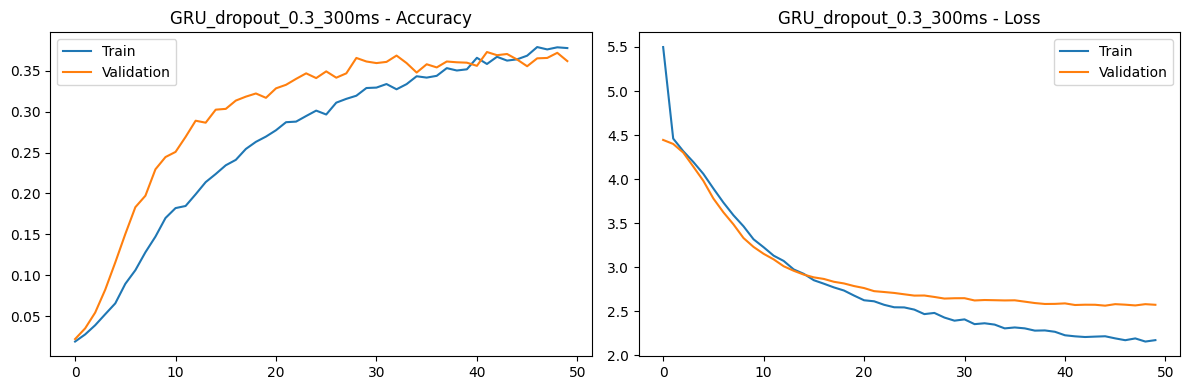

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


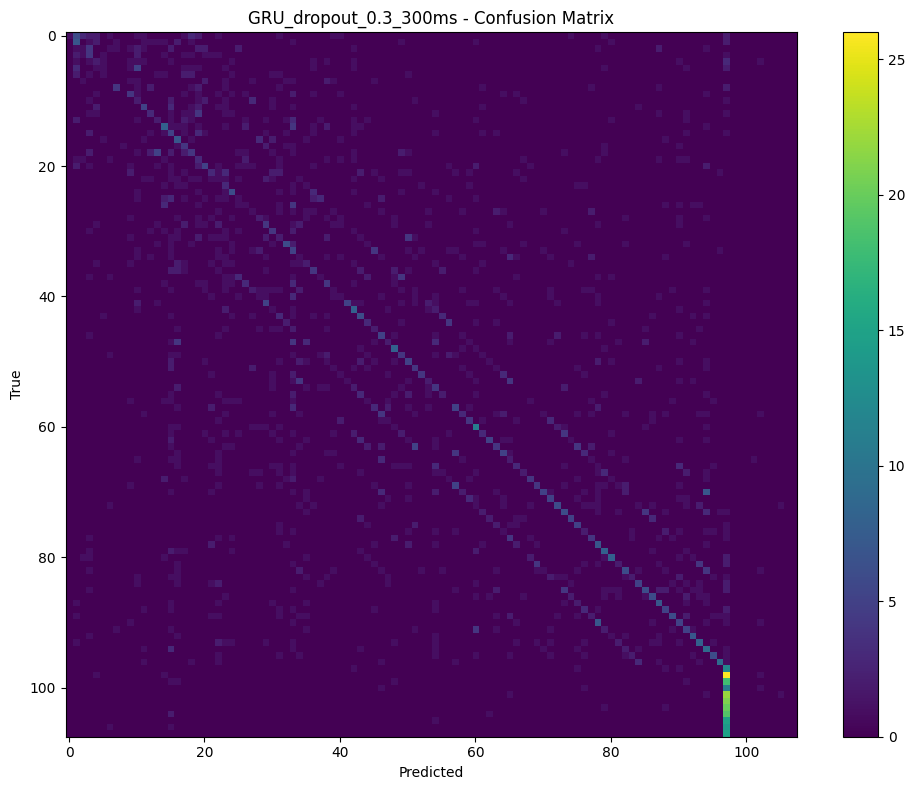


Frame Length Evaluation Results:
 Frame Length (ms)  Accuracy            Model Name
               150  0.450337 GRU_dropout_0.3_150ms
                70  0.390067  GRU_dropout_0.3_70ms
                35  0.333655  GRU_dropout_0.3_35ms
               300  0.196239 GRU_dropout_0.3_300ms


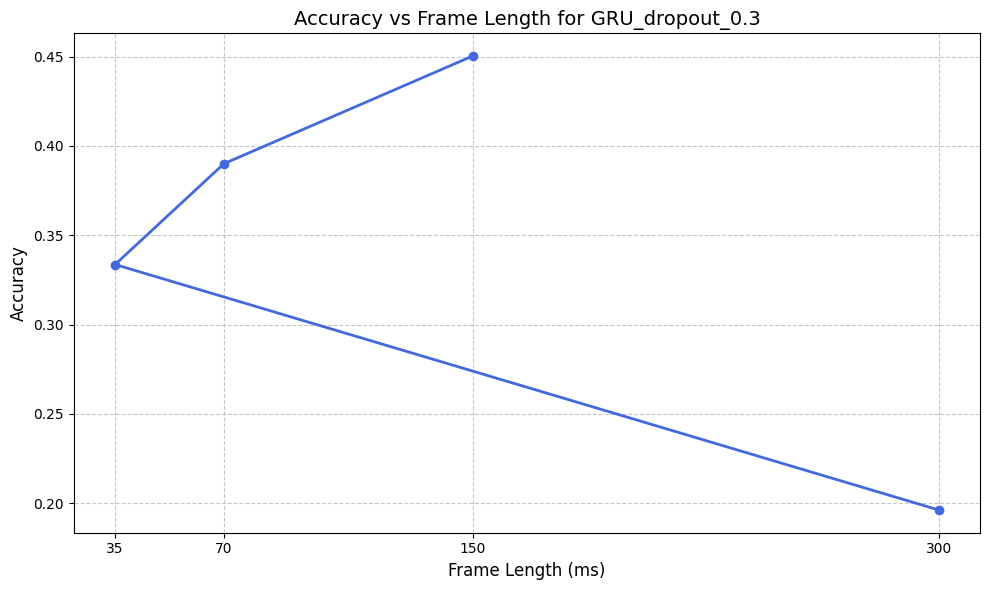

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

frame_lengths=[35, 70, 150, 300]
results = []

def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ModelCheckpoint(f'best_{model_name}.keras', save_best_only=True)
    ]
    
    history = model.fit(X_train, y_train,
                       validation_data=(X_val, y_val),
                       epochs=50,
                       batch_size=32,
                       callbacks=callbacks)
    
    test_loss, test_acc = model.evaluate(X_test, y_test)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{model_name} - Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred_classes)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', aspect='auto')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    return history, test_acc
    
for frame_length in frame_lengths:
    print(f"\nAnalyzing frame length: {frame_length} ms")

    X_train = np.array([process_audio(file, frame_length) for file in train_df['path']])
    X_val = np.array([process_audio(file, frame_length) for file in val_df['path']])
    X_test = np.array([process_audio(file, frame_length) for file in test_df['path']])

    input_shape = (X_train.shape[1], X_train.shape[2])

    best_model = Sequential([
        GRU(128, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        GRU(64),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(108, activation='softmax')
    ])
    model_name = f'GRU_dropout_0.3_{frame_length}ms'

    print(f"Training model: {model_name}")
    history, acc = train_and_evaluate(model, X_train, y_train, X_val, y_val,
                                      X_test, y_test, model_name)
    
    results.append({
        'Frame Length (ms)': frame_length,
        'Accuracy': acc,
        'Model Name': model_name
    })

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

print("\nFrame Length Evaluation Results:")
print(results_df.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.plot(results_df['Frame Length (ms)'], results_df['Accuracy'], marker='o', linewidth=2, color='royalblue')
plt.title(f'Accuracy vs Frame Length for GRU_dropout_0.3', fontsize=14)
plt.xlabel('Frame Length (ms)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(frame_lengths)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Epoch 1/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 207s 673ms/step - accuracy: 0.0175 - loss: 4.5512 - val_accuracy: 0.0545 - val_loss: 3.8670
Epoch 2/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 203s 671ms/step - accuracy: 0.0520 - loss: 3.8323 - val_accuracy: 0.0603 - val_loss: 3.6066
Epoch 3/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 204s 671ms/step - accuracy: 0.0654 - loss: 3.6142 - val_accuracy: 0.0767 - val_loss: 3.4737
Epoch 4/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 203s 670ms/step - accuracy: 0.0752 - loss: 3.4461 - val_accuracy: 0.0878 - val_loss: 3.4188
Epoch 5/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 204s 672ms/step - accuracy: 0.0917 - loss: 3.4018 - val_accuracy: 0.0969 - val_loss: 3.3233
Epoch 6/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 204s 671ms/step - accuracy: 0.0956 - loss: 3.2879 - val_accuracy: 0.1123 - val_loss: 3.2024
Epoch 7/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 204s 671ms/step - accuracy: 0.1099 - loss: 3.1940 - val_accuracy: 0.1471 - val_loss: 3.1661
Epoch 8/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 204s 672ms/step - accuracy: 0.1253 -

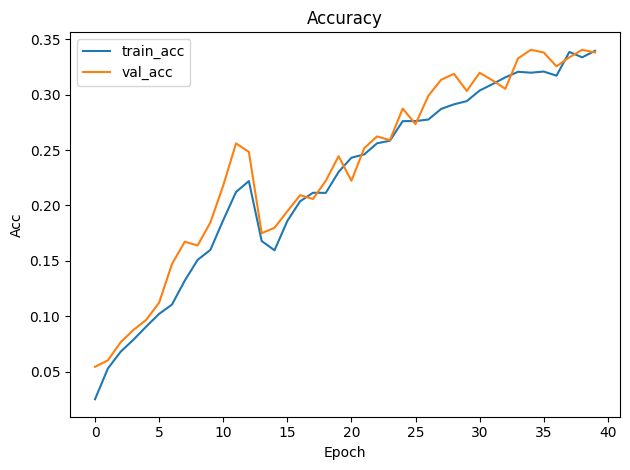

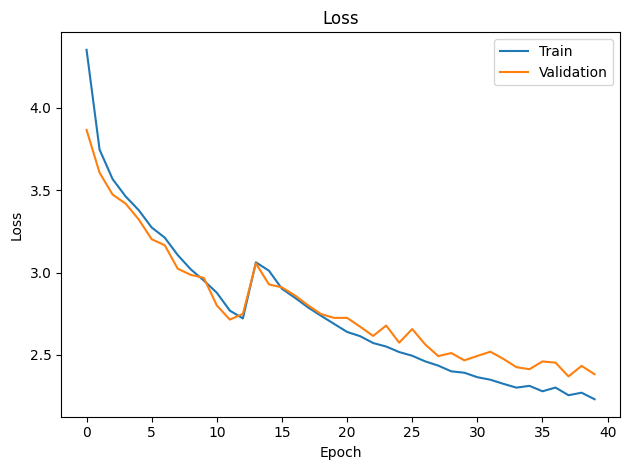

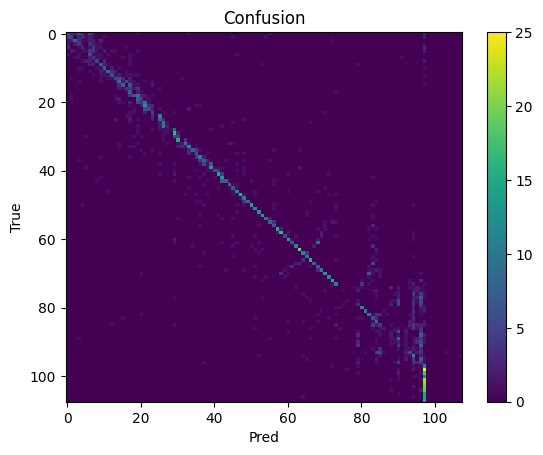

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pywt 
import librosa
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import GRU, Dropout, Dense



FRAME_LENGTH_MS = 250
SAMPLE_RATE = 44100
FRAME_LEN = int(SAMPLE_RATE * FRAME_LENGTH_MS / 1000)



def load_frame(path, frame_length=FRAME_LEN):
    sr, data = wavfile.read(path)
    if data.ndim > 1:
        data = data.mean(axis=1)
    if len(data) < frame_length:
        data = np.pad(data, (0, frame_length - len(data)))
    else:
        data = data[:frame_length]
    return data.astype(np.float32) / np.max(np.abs(data))



def process_audio_combined(
    path,
    sr=SAMPLE_RATE,
    n_mfcc=40,
    n_mels=40,
    wavelet='db4',
    level=5
):
    y = load_frame(path)

    # raw waveform
    raw = y

    # FFT magnitudes
    fft_mag = np.abs(np.fft.rfft(y))

    # Mel‑spectrogram in dB
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Chroma
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Spectral centroids (1D)
    centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    # Wavelet
    coeffs = pywt.wavedec(y, wavelet, level=level)
    wv0 = coeffs[0]

    features = np.concatenate([
        fft_mag.flatten(),
        mel_db.flatten(),
        mfcc.flatten(),
        chroma.flatten(),
        centroids.flatten(),
        wv0.flatten(),
    ])

    return features.reshape(-1, 1)



def extract_and_save(paths, feature_fn, save_path):
    arr = np.array([feature_fn(p) for p in paths], dtype=np.float32)
    np.save(save_path, arr)


extract_and_save(train_df['path'], process_audio_combined,   'X_train_combined.npy')

extract_and_save(val_df['path'], process_audio_combined,   'X_val_combined.npy')

extract_and_save(test_df['path'], process_audio_combined,   'X_test_combined.npy')




def make_dataset(X_path, labels, batch_size=32, shuffle=True):
    X = np.load(X_path)
    y_int = LabelEncoder().fit_transform(labels)
    y_cat = tf.keras.utils.to_categorical(y_int)
    ds = tf.data.Dataset.from_tensor_slices((X, y_cat))
    if shuffle:
        ds = ds.shuffle(len(labels))
    return ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)



def build_gru_model(input_shape, num_classes):
    inp = Input(shape=input_shape, name='input')
    x = GRU(128, return_sequences=True)(inp)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='softmax')(x)
    model = Model(inp, out)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model




X_train_path = f'X_train_combined.npy'
X_val_path   = f'X_val_combined.npy'
X_test_path  = f'X_test_combined.npy'

train_ds = make_dataset(X_train_path, train_df['note'])
val_ds   = make_dataset(X_val_path,   val_df['note'], shuffle=False)
test_ds  = make_dataset(X_test_path,  test_df['note'], shuffle=False)

le = LabelEncoder().fit(train_df['note'])


sample_X, _ = next(iter(train_ds))
inp_shape = sample_X.shape[1:]
num_cls = len(le.classes_)

model = build_gru_model(inp_shape, num_cls)
hist = model.fit(train_ds, validation_data=val_ds, epochs=40)

loss, acc = model.evaluate(test_ds)
print(f"loss: {loss:.4f}, acc: {acc:.4f}")

y_true = np.concatenate([y for _, y in test_ds], axis=0)
y_pred = model.predict(test_ds)
cm = confusion_matrix(np.argmax(y_true,1), np.argmax(y_pred,1))

plt.figure()
plt.plot(hist.history['accuracy'], label='train_acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.title(f'Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Validation')
plt.title(f'Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure()
plt.imshow(cm, aspect='auto')
plt.title(f'Confusion')
plt.colorbar()
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

Train set shape  : (19352, 1, 11025, 1)
Validation shape : (2074, 1, 11025, 1)
Test shape       : (2074, 1, 11025, 1)

Training RNN
Epoch 1/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1249 - loss: 4.2873 - val_accuracy: 0.2989 - val_loss: 3.4143
Epoch 2/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3179 - loss: 3.0926 - val_accuracy: 0.3544 - val_loss: 2.9267
Epoch 3/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4088 - loss: 2.4535 - val_accuracy: 0.3780 - val_loss: 2.7577
Epoch 4/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4702 - loss: 2.0994 - val_accuracy: 0.3746 - val_loss: 2.7714
Epoch 5/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5151 - loss: 1.8557 - val_accuracy: 0.3770 - val_loss: 2.7592
Epoch 6/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5363 - loss: 1.7252 - val_accuracy: 0.3761 - val_loss: 2.8107
Epoch 7/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5600 - loss: 1.5894 - val_accuracy

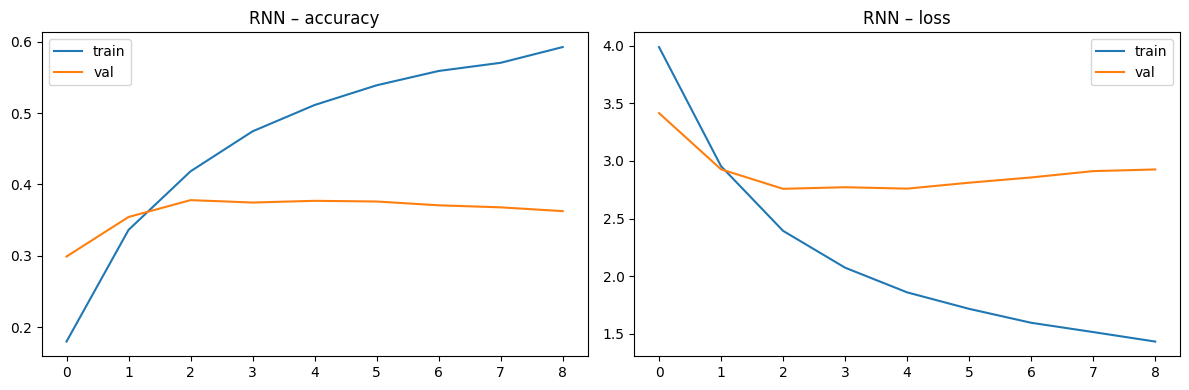


>>> RNN – Test accuracy: 0.382
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


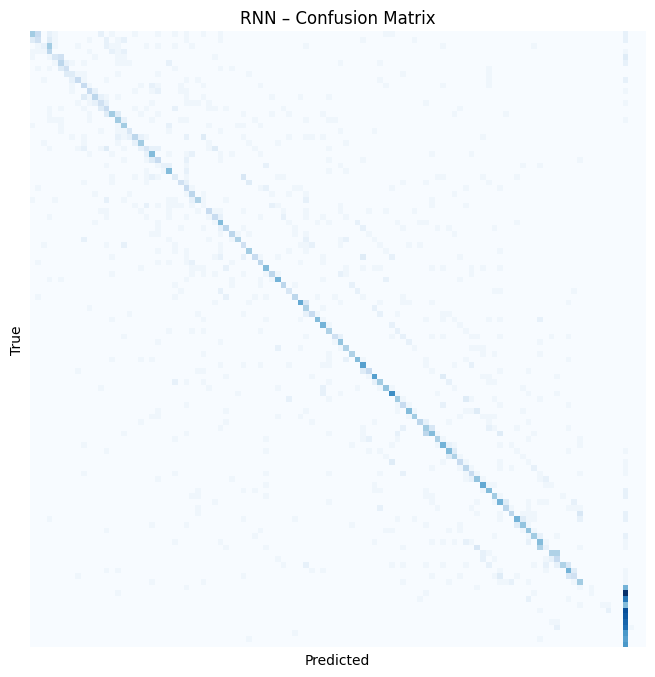

              precision    recall  f1-score   support

           0       0.56      0.29      0.38        31
           1       0.29      0.21      0.24        24
           2       0.33      0.08      0.13        25
           3       0.23      0.41      0.30        17
           4       0.40      0.22      0.29        18
           5       0.35      0.33      0.34        21
           6       0.50      0.36      0.42        14
           7       0.33      0.23      0.27        13
           8       0.50      0.35      0.41        17
           9       0.27      0.33      0.30        18
          10       0.40      0.38      0.39        16
          11       0.50      0.35      0.41        20
          12       0.31      0.28      0.29        18
          13       0.21      0.29      0.24        21
          14       0.45      0.36      0.40        25
          15       0.35      0.39      0.37        23
          16       0.35      0.50      0.41        18
          17       0.44    

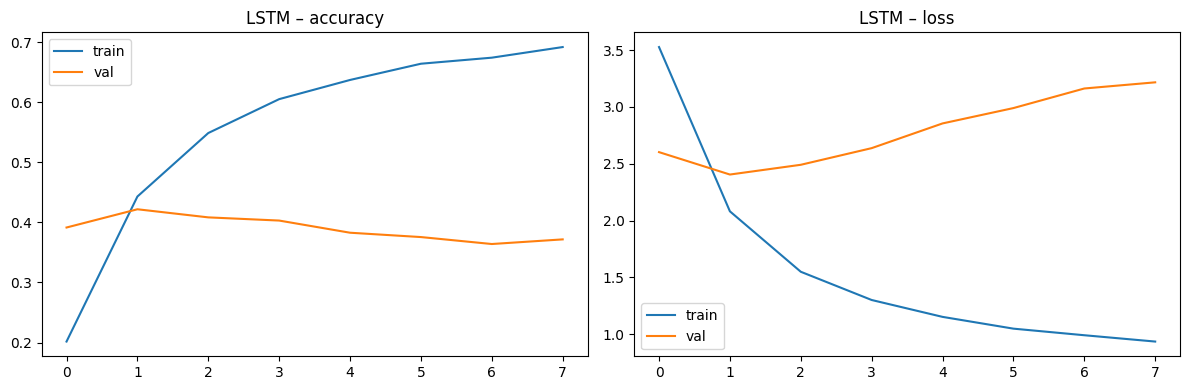


>>> LSTM – Test accuracy: 0.411
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


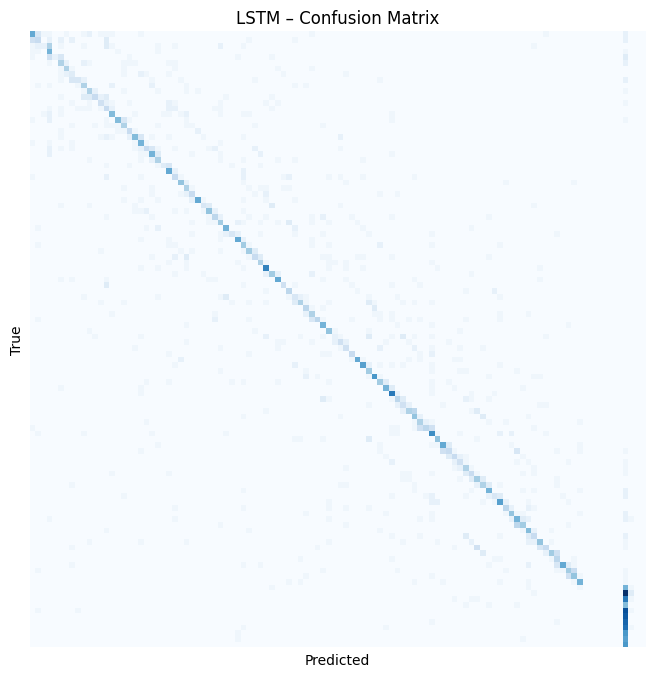

              precision    recall  f1-score   support

           0       0.52      0.42      0.46        31
           1       0.30      0.25      0.27        24
           2       0.50      0.08      0.14        25
           3       0.29      0.71      0.41        17
           4       1.00      0.11      0.20        18
           5       0.30      0.38      0.33        21
           6       0.62      0.57      0.59        14
           7       0.17      0.23      0.19        13
           8       0.57      0.24      0.33        17
           9       0.38      0.44      0.41        18
          10       0.40      0.50      0.44        16
          11       0.60      0.30      0.40        20
          12       0.42      0.28      0.33        18
          13       0.19      0.29      0.23        21
          14       0.50      0.44      0.47        25
          15       0.79      0.48      0.59        23
          16       0.38      0.44      0.41        18
          17       0.46    

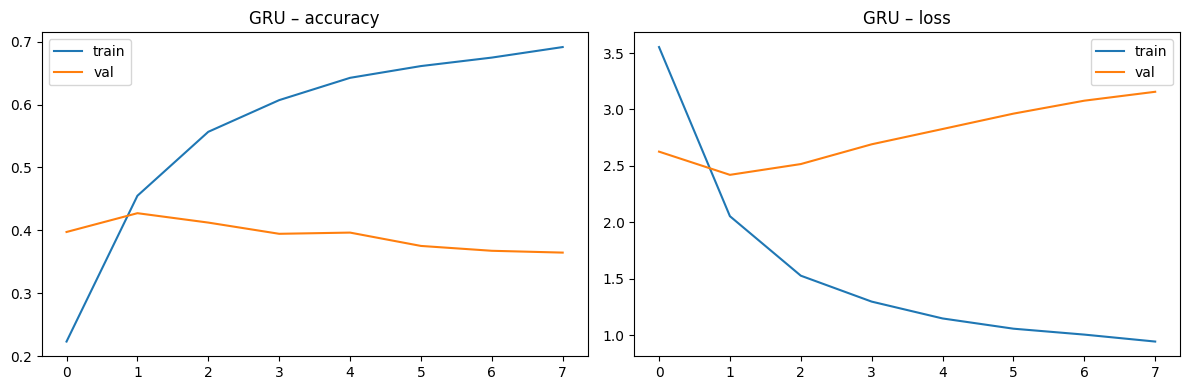


>>> GRU – Test accuracy: 0.419
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


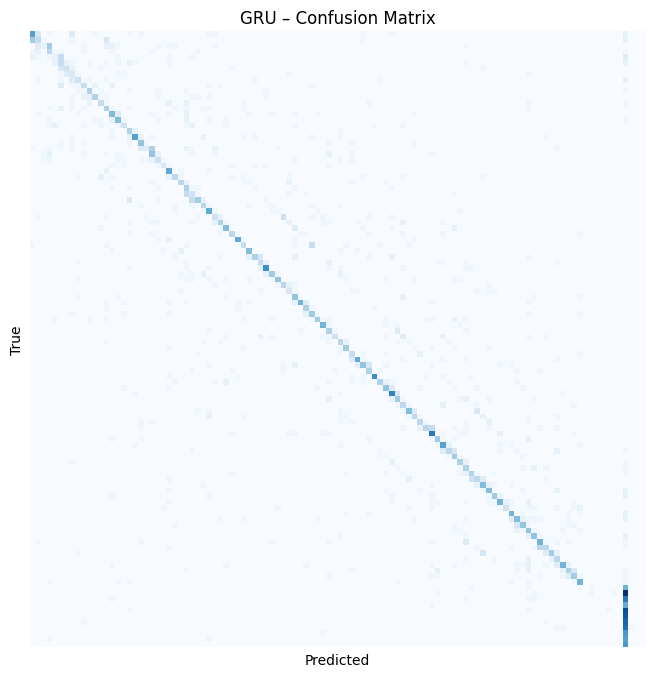

              precision    recall  f1-score   support

           0       0.50      0.45      0.47        31
           1       0.30      0.25      0.27        24
           2       0.40      0.08      0.13        25
           3       0.26      0.41      0.32        17
           4       0.25      0.11      0.15        18
           5       0.23      0.29      0.26        21
           6       0.50      0.36      0.42        14
           7       0.17      0.31      0.22        13
           8       0.36      0.29      0.32        17
           9       0.35      0.33      0.34        18
          10       0.53      0.50      0.52        16
          11       0.67      0.40      0.50        20
          12       0.43      0.33      0.38        18
          13       0.30      0.38      0.33        21
          14       0.38      0.44      0.41        25
          15       0.48      0.48      0.48        23
          16       0.42      0.28      0.33        18
          17       0.32    

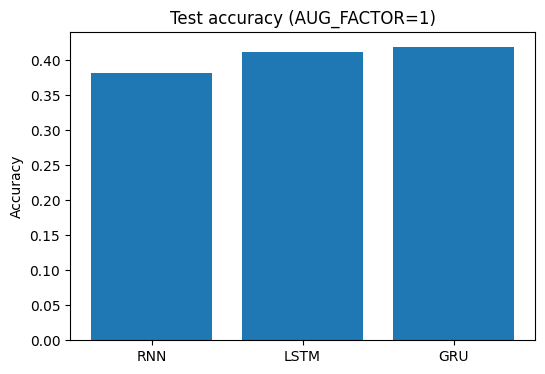

In [20]:
import os, random
import numpy as np, pandas as pd, librosa, tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

SR            = 44_100
FRAME_MS      = 250
N_SAMPLES     = int(SR * FRAME_MS / 1000)
RANDOM_SEED   = 42
BATCH_SIZE    = 32
EPOCHS        = 30
AUG_FACTOR    = 1
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)



def augment_audio(y, sr=SR):
    if random.random() < 0.5:                 # pitch
        steps = random.choice([-1, 1])
        y = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=steps)
    if random.random() < 0.5:                 # stretch
        rate = random.uniform(0.9, 1.1)
        y = librosa.effects.time_stretch(y=y, rate=rate)
    return y

def process_audio(fp, augment=False):
    y, _ = librosa.load(fp, sr=SR)
    y = y / (np.max(np.abs(y)))
    if augment:
        y = augment_audio(y, SR)
    if len(y) > N_SAMPLES:
        y = y[:N_SAMPLES]
    else:
        y = np.pad(y, (0, N_SAMPLES-len(y)))
    return y.reshape(1, -1, 1)



train_df = pd.read_csv('splits/train_split.csv')
val_df   = pd.read_csv('splits/validation_split.csv')
test_df  = pd.read_csv('splits/test_split.csv')

label_map = {n:i for i,n in enumerate(sorted(train_df['note'].unique()))}


def build_dataset(df, augment_times=0):
    X, y = [], []
    for _, row in df.iterrows():
        fp, note = row['path'], row['note']
        # original
        X.append(process_audio(fp, augment=False))
        y.append(label_map[note])
        # augmented copies
        for _ in range(augment_times):
            X.append(process_audio(fp, augment=True))
            y.append(label_map[note])
    return np.stack(X), np.array(y)


X_train, y_train = build_dataset(train_df, AUG_FACTOR)
X_val,   y_val   = build_dataset(val_df,   0)
X_test,  y_test  = build_dataset(test_df,  0)

input_shape = (N_SAMPLES, 1)
print(f'Train set shape  : {X_train.shape}')
print(f'Validation shape : {X_val.shape}')
print(f'Test shape       : {X_test.shape}')



def create_models(shape, n_classes=108):
    models = {}
    models['RNN'] = Sequential([
        SimpleRNN(128, input_shape=shape, return_sequences=True),
        SimpleRNN(64),
        Dense(256, activation='relu'), Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])
    models['LSTM'] = Sequential([
        LSTM(128, input_shape=shape, return_sequences=True),
        LSTM(64),
        Dense(256, activation='relu'), Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])
    models['GRU'] = Sequential([
        GRU(128, input_shape=shape, return_sequences=True),
        GRU(64),
        Dense(256, activation='relu'), Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])
    return models



def train_and_evaluate(model, name):
    model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])
    cbs = [EarlyStopping(patience=6, restore_best_weights=True),
           ModelCheckpoint(f'best_{name}.keras', save_best_only=True)]
    hist = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                     epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=cbs)
    

    fig, ax = plt.subplots(1,2, figsize=(12,4))
    ax[0].plot(hist.history['accuracy'])
    ax[0].plot(hist.history['val_accuracy'])
    ax[0].set_title(f'{name} – accuracy')
    ax[0].legend(['train','val'])
    ax[1].plot(hist.history['loss'])
    ax[1].plot(hist.history['val_loss'])
    ax[1].set_title(f'{name} – loss')
    ax[1].legend(['train','val'])
    plt.tight_layout()
    plt.show()
    
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'\n>>> {name} – Test accuracy: {test_acc:.3f}')
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, cmap='Blues', square=True, cbar=False,
                xticklabels=False, yticklabels=False)
    plt.title(f'{name} – Confusion Matrix')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.show()
    
    print(classification_report(y_test, y_pred, zero_division=0))
    return test_acc



input_shape = (X_train.shape[1], X_train.shape[2])
scores, models = {}, create_models(input_shape)
for name, m in models.items():
    print('\n' + '='*34 + f'\nTraining {name}')
    scores[name] = train_and_evaluate(m, name)


plt.figure(figsize=(6,4))
plt.bar(scores.keys(), scores.values())
plt.ylabel('Accuracy')
plt.title(f'Test accuracy (AUG_FACTOR={AUG_FACTOR})')
plt.show()


Building RAW-waveform datasets …
Building spectrogram datasets …

Training RNN (sequence len=1) …
Epoch 1/30
303/303 - 9s - 29ms/step - accuracy: 0.1793 - loss: 4.1151 - val_accuracy: 0.2878 - val_loss: 3.6560
Epoch 2/30
303/303 - 1s - 4ms/step - accuracy: 0.3670 - loss: 3.0891 - val_accuracy: 0.3578 - val_loss: 3.1107
Epoch 3/30
303/303 - 1s - 4ms/step - accuracy: 0.4848 - loss: 2.3505 - val_accuracy: 0.3915 - val_loss: 2.8328
Epoch 4/30
303/303 - 1s - 4ms/step - accuracy: 0.5681 - loss: 1.8831 - val_accuracy: 0.4176 - val_loss: 2.7296
Epoch 5/30
303/303 - 1s - 4ms/step - accuracy: 0.6252 - loss: 1.5758 - val_accuracy: 0.4185 - val_loss: 2.7042
Epoch 6/30
303/303 - 1s - 3ms/step - accuracy: 0.6656 - loss: 1.3624 - val_accuracy: 0.4248 - val_loss: 2.7101
Epoch 7/30
303/303 - 1s - 3ms/step - accuracy: 0.6992 - loss: 1.1928 - val_accuracy: 0.4262 - val_loss: 2.7822
Epoch 8/30
303/303 - 1s - 3ms/step - accuracy: 0.7137 - loss: 1.0935 - val_accuracy: 0.4320 - val_loss: 2.8094
Epoch 9/30
3

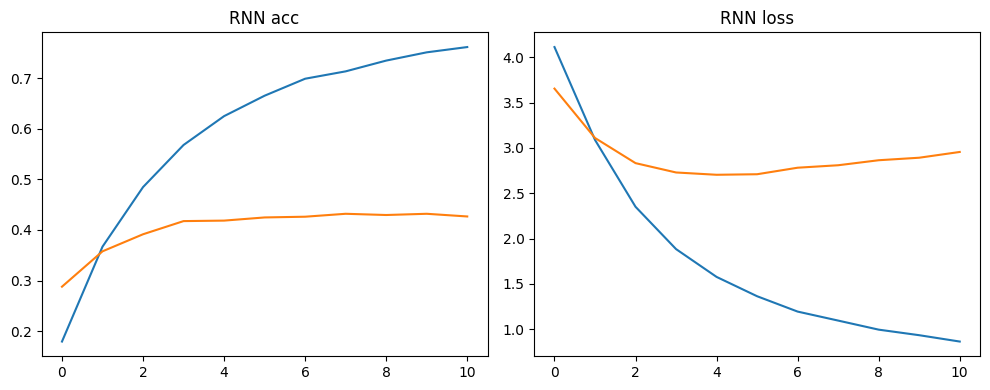

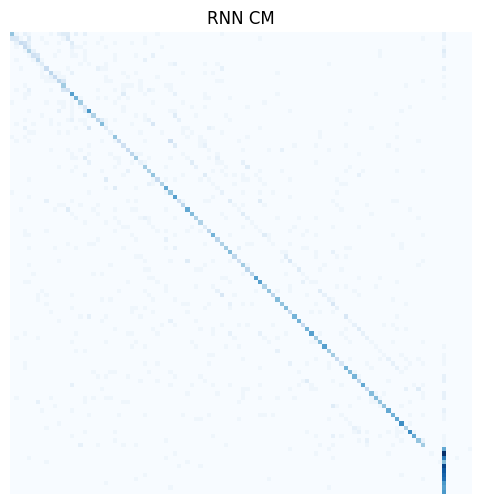

              precision    recall  f1-score   support

           0       0.59      0.32      0.42        31
           1       0.29      0.17      0.21        24
           2       0.67      0.24      0.35        25
           3       0.22      0.35      0.27        17
           4       0.26      0.44      0.33        18
           5       0.45      0.24      0.31        21
           6       0.41      0.50      0.45        14
           7       0.27      0.23      0.25        13
           8       0.35      0.35      0.35        17
           9       0.41      0.39      0.40        18
          10       0.50      0.38      0.43        16
          11       0.30      0.35      0.33        20
          12       0.36      0.50      0.42        18
          13       0.25      0.24      0.24        21
          14       0.33      0.56      0.42        25
          15       0.52      0.52      0.52        23
          16       0.47      0.50      0.49        18
          17       0.16    

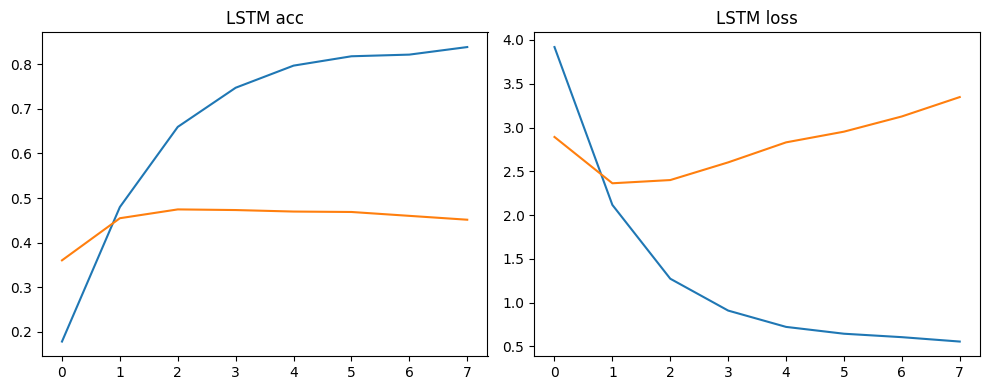

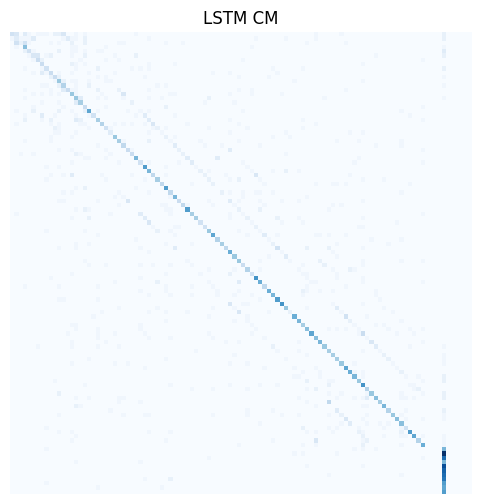

              precision    recall  f1-score   support

           0       0.83      0.16      0.27        31
           1       0.19      0.12      0.15        24
           2       0.50      0.08      0.14        25
           3       0.37      0.65      0.47        17
           4       0.56      0.28      0.37        18
           5       0.27      0.19      0.22        21
           6       0.50      0.43      0.46        14
           7       0.30      0.46      0.36        13
           8       0.33      0.29      0.31        17
           9       0.30      0.33      0.32        18
          10       0.43      0.38      0.40        16
          11       0.27      0.50      0.35        20
          12       0.35      0.44      0.39        18
          13       0.60      0.29      0.39        21
          14       0.27      0.40      0.32        25
          15       0.24      0.43      0.31        23
          16       0.50      0.50      0.50        18
          17       0.23    

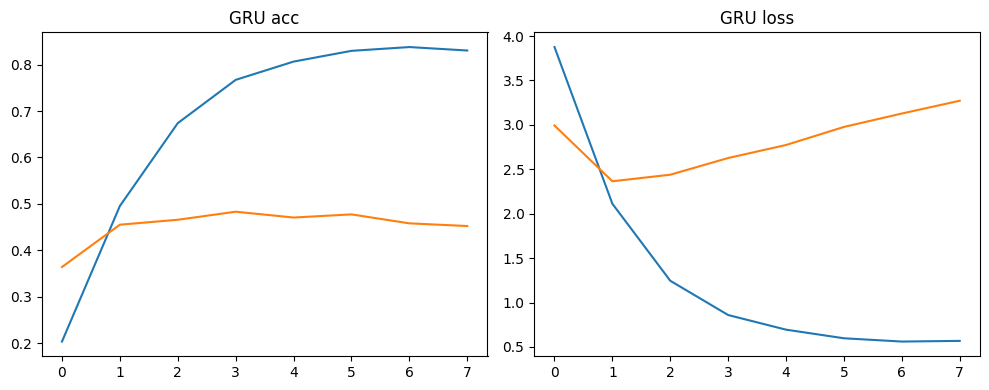

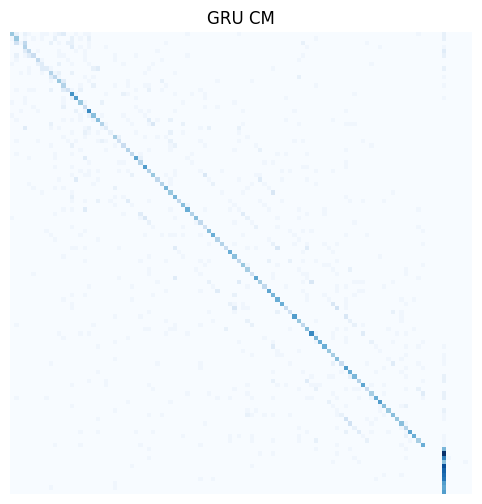

              precision    recall  f1-score   support

           0       0.67      0.32      0.43        31
           1       0.38      0.42      0.40        24
           2       0.33      0.04      0.07        25
           3       0.30      0.47      0.36        17
           4       0.44      0.39      0.41        18
           5       0.55      0.29      0.37        21
           6       0.58      0.50      0.54        14
           7       0.27      0.23      0.25        13
           8       0.50      0.18      0.26        17
           9       0.33      0.44      0.38        18
          10       0.39      0.44      0.41        16
          11       0.43      0.50      0.47        20
          12       0.28      0.44      0.34        18
          13       0.56      0.24      0.33        21
          14       0.33      0.64      0.44        25
          15       0.60      0.65      0.63        23
          16       0.43      0.56      0.49        18
          17       0.21    

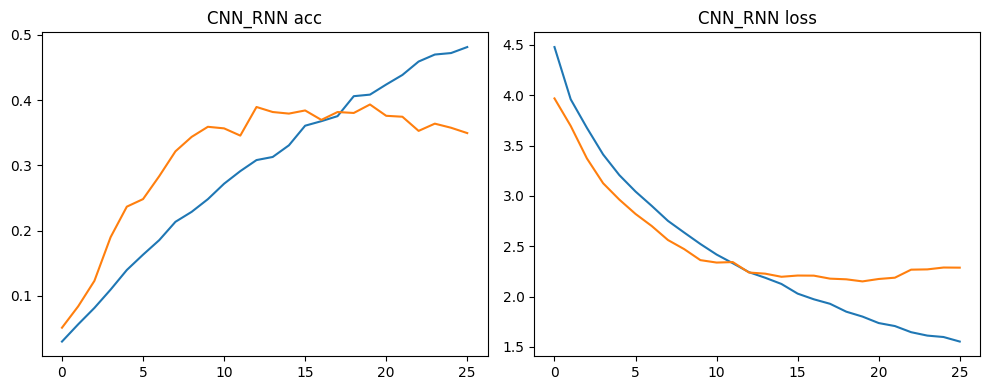

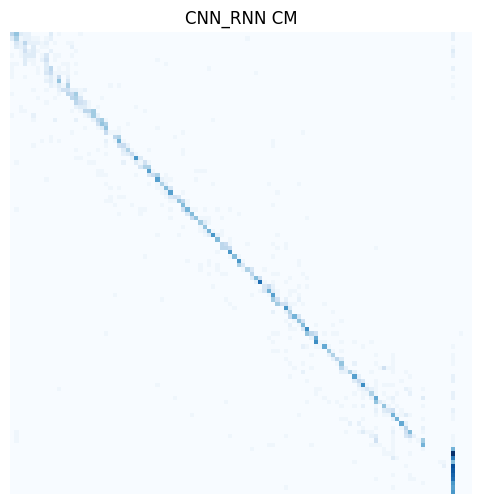

              precision    recall  f1-score   support

           0       0.41      0.23      0.29        31
           1       0.26      0.33      0.29        24
           2       0.17      0.08      0.11        25
           3       0.13      0.24      0.17        17
           4       0.17      0.11      0.13        18
           5       0.16      0.14      0.15        21
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        13
           8       0.10      0.18      0.13        17
           9       0.20      0.33      0.25        18
          10       0.10      0.06      0.08        16
          11       0.36      0.50      0.42        20
          12       0.12      0.06      0.08        18
          13       0.17      0.24      0.20        21
          14       0.29      0.24      0.26        25
          15       0.23      0.35      0.28        23
          16       0.29      0.28      0.29        18
          17       0.17    

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


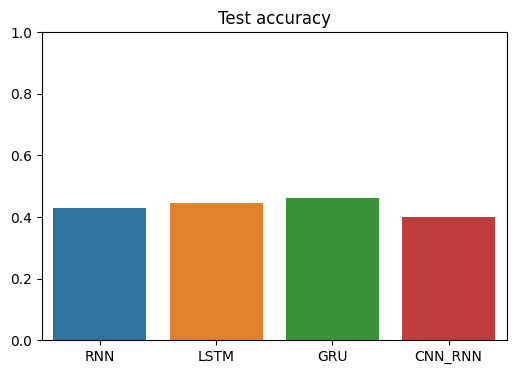


Summary:
 RNN     : 0.428
 LSTM    : 0.445
 GRU     : 0.462
 CNN_RNN : 0.400


In [6]:
import os, random, warnings
from pathlib import Path
from collections import Counter

import numpy as np, pandas as pd, librosa, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, SimpleRNN, GRU, Bidirectional, Dropout,
    Conv2D, MaxPooling2D, Flatten, Input, TimeDistributed,
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings("ignore", category=UserWarning)



mixed_precision.set_global_policy("mixed_float16")

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


SR              = 44_100
FRAME_MS        = 250
N_SAMPLES       = int(SR*FRAME_MS/1000)
TIME_MAJOR      = False
BATCH_SIZE      = 32
EPOCHS          = 30
PATIENCE        = 6
LR              = 1e-3
AUG_PER_SAMPLE  = 0


train_df = pd.read_csv("splits/train_split.csv")
val_df = pd.read_csv("splits/validation_split.csv")
test_df = pd.read_csv("splits/test_split.csv")

NOTE_LIST = sorted(train_df.note.unique())
NOTE2IDX = {n:i for i,n in enumerate(NOTE_LIST)}
NUM_CLASSES=len(NOTE_LIST)




def augment_audio(y, sr=SR):
    if random.random()<0.5:
        y = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=random.choice([-1,1]))
    if random.random()<0.5:
        y = librosa.effects.time_stretch(y=y, rate=random.uniform(0.9,1.1))
    return y

def load_frame(fp, augment=False):
    y,_ = librosa.load(fp, sr=SR, mono=True)
    y   = y/ (np.max(np.abs(y)))
    if augment: y=augment_audio(y)
    if len(y)<N_SAMPLES: y=np.pad(y,(0,N_SAMPLES-len(y)))
    y=y[:N_SAMPLES]
    if TIME_MAJOR:
        return y.reshape(-1,1)
    else:
        return y.reshape(1,-1)

        

def build_wave_ds(df, training=False):
    X,y=[],[]
    for _,r in df.iterrows():
        X.append(load_frame(r.path, augment=False))
        y.append(NOTE2IDX[r.note])
        if training:
            for _ in range(AUG_PER_SAMPLE):
                X.append(load_frame(r.path, augment=True))
                y.append(NOTE2IDX[r.note])
    X=np.expand_dims(np.stack(X).astype('float32'), -1) if TIME_MAJOR else np.expand_dims(np.stack(X).astype('float32'),-1)
    y=np.array(y, dtype=np.int32)
    return shuffle(X,y,random_state=RANDOM_SEED)



N_MELS, HOP, WIN = 256, 1024, 2048

def wav_to_mel(y):
    S = librosa.feature.melspectrogram(y=y, sr=SR, n_fft=WIN, hop_length=HOP, n_mels=N_MELS)
    return librosa.power_to_db(S, ref=np.max)


def build_spec_ds(df, training=False):
    X,y=[],[]; max_T=0
    for _,r in df.iterrows():
        base=load_frame(r.path, augment=training)
        mel=wav_to_mel(base.squeeze())
        max_T=max(max_T,mel.shape[1])
        X.append(mel)
        y.append(NOTE2IDX[r.note])
    X=[np.pad(m,((0,0),(0,max_T-m.shape[1])),constant_values=m.min()) for m in X]
    X=np.expand_dims(np.array(X,dtype='float32'),-1)
    y=np.array(y,dtype=np.int32)
    return shuffle(X,y,random_state=RANDOM_SEED)




def build_rnn(model_type,input_shape):
    layer={'RNN':SimpleRNN,'LSTM':LSTM,'GRU':GRU}[model_type]
    model=Sequential([
        layer(128,input_shape=input_shape,return_sequences=True),
        layer(64),
        Dense(256,activation='relu'),Dropout(0.3),
        Dense(NUM_CLASSES,activation='softmax',dtype='float32')
    ])
    model.compile(Adam(LR), 'sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


def build_cnn_rnn(input_shape):
    inp=Input(shape=input_shape)
    x=Conv2D(64,3,padding='same',activation='relu')(inp)
    x=MaxPooling2D(2)(x)
    x=Conv2D(128,3,padding='same',activation='relu')(x)
    x=MaxPooling2D(2)(x)
    x=TimeDistributed(Flatten())(x)
    x=Bidirectional(GRU(128))(x)
    x=Dropout(0.3)(x)
    out=Dense(NUM_CLASSES,activation='softmax',dtype='float32')(x)
    model=Model(inp,out)
    model.compile(Adam(LR),'sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

    

def run(model,name,X_tr,y_tr,X_val,y_val,X_te,y_te):
    cb=[EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True), ModelCheckpoint(f'best_{name}.keras',save_best_only=True)]
    h=model.fit(X_tr,y_tr,validation_data=(X_val,y_val),epochs=EPOCHS,batch_size=BATCH_SIZE,callbacks=cb,verbose=2)
    _,acc=model.evaluate(X_te,y_te,verbose=0)
    print(f"\n{name} test acc: {acc:.3f}")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title(name+' acc')
    plt.subplot(1,2,2)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title(name+' loss')
    plt.tight_layout()
    plt.show()

    y_pred=np.argmax(model.predict(X_te,verbose=0),1)
    cm=confusion_matrix(y_te,y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,cmap='Blues',square=True,xticklabels=False,yticklabels=False,cbar=False)
    plt.title(name+' CM')
    plt.show()
    print(classification_report(y_te,y_pred,zero_division=0))
    return acc


if __name__=='__main__':
    print('\nBuilding RAW-waveform datasets …')
    X_tr_w,y_tr_w=build_wave_ds(train_df,True)
    X_val_w,y_val_w=build_wave_ds(val_df,False)
    X_te_w,y_te_w=build_wave_ds(test_df,False)
    w_shape=(X_tr_w.shape[1],X_tr_w.shape[2]) if TIME_MAJOR else (X_tr_w.shape[1],X_tr_w.shape[2])

    print('Building spectrogram datasets …')
    X_tr_s,y_tr_s=build_spec_ds(train_df,True)
    X_val_s,y_val_s=build_spec_ds(val_df,False)
    X_te_s,y_te_s=build_spec_ds(test_df,False)
    s_shape=X_tr_s.shape[1:]

    results={}
    for typ in ['RNN','LSTM','GRU']:
        print(f"\nTraining {typ} (sequence len={'1' if not TIME_MAJOR else N_SAMPLES}) …")
        acc=run(build_rnn(typ,w_shape),typ,X_tr_w,y_tr_w,X_val_w,y_val_w,X_te_w,y_te_w)
        results[typ]=acc

    print('\nTraining CNN_RNN …')
    acc=run(build_cnn_rnn(s_shape),'CNN_RNN',X_tr_s,y_tr_s,X_val_s,y_val_s,X_te_s,y_te_s)
    results['CNN_RNN']=acc

    plt.figure(figsize=(6,4))
    sns.barplot(x=list(results.keys()),y=list(results.values()))
    plt.ylim(0,1)
    plt.title('Test accuracy')
    plt.show()
    print('\nSummary:'); [print(f" {k:8s}: {v:.3f}") for k,v in results.items()]